<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Statistical-Comparison-of-BigBEts-and-MWU" data-toc-modified-id="Statistical-Comparison-of-BigBEts-and-MWU-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistical Comparison of BigBEts and MWU</a></span></li><li><span><a href="#Pathway-level-BiG-BET-scores" data-toc-modified-id="Pathway-level-BiG-BET-scores-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pathway level BiG-BET scores</a></span><ul class="toc-item"><li><span><a href="#Histogram-of-DDR-BigBET-scores" data-toc-modified-id="Histogram-of-DDR-BigBET-scores-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Histogram of DDR BigBET scores</a></span></li><li><span><a href="#Histogram-of-BIG-BET-scores-for-all-genes" data-toc-modified-id="Histogram-of-BIG-BET-scores-for-all-genes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Histogram of BIG-BET scores for all genes</a></span></li></ul></li><li><span><a href="#GO-Term-Analysis-of-low-big-bet-genes" data-toc-modified-id="GO-Term-Analysis-of-low-big-bet-genes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>GO Term Analysis of low big-bet genes</a></span><ul class="toc-item"><li><span><a href="#lowest-z-score-genes" data-toc-modified-id="lowest-z-score-genes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>lowest z-score genes</a></span></li></ul></li><li><span><a href="#Supplemental-Figures" data-toc-modified-id="Supplemental-Figures-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Supplemental Figures</a></span><ul class="toc-item"><li><span><a href="#Histogram-of-TMB-values-by-DDR-pathways" data-toc-modified-id="Histogram-of-TMB-values-by-DDR-pathways-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Histogram of TMB values by DDR pathways</a></span></li><li><span><a href="#Histogram-of-pvalues-All-+-DDR-Genes" data-toc-modified-id="Histogram-of-pvalues-All-+-DDR-Genes-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Histogram of pvalues All + DDR Genes</a></span></li><li><span><a href="#Individual-Gene-CDFs" data-toc-modified-id="Individual-Gene-CDFs-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Individual Gene CDFs</a></span></li><li><span><a href="#TCGA-vs-Samstein-BiG-BET-scores" data-toc-modified-id="TCGA-vs-Samstein-BiG-BET-scores-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>TCGA vs Samstein BiG-BET scores</a></span></li><li><span><a href="#TCGA-High-vs-High-+-Mod-BIG-BET-Scores" data-toc-modified-id="TCGA-High-vs-High-+-Mod-BIG-BET-Scores-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>TCGA High vs High + Mod BIG-BET Scores</a></span></li><li><span><a href="#TCGA-vs-TCGA-Samstein-Types-only" data-toc-modified-id="TCGA-vs-TCGA-Samstein-Types-only-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>TCGA vs TCGA Samstein Types only</a></span></li><li><span><a href="#Differences-in-BiG-BET-scores-for-hotspot-mutations" data-toc-modified-id="Differences-in-BiG-BET-scores-for-hotspot-mutations-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Differences in BiG-BET scores for hotspot mutations</a></span></li><li><span><a href="#Percentage-Genes-High-BigBETS-by-pathway" data-toc-modified-id="Percentage-Genes-High-BigBETS-by-pathway-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Percentage Genes High BigBETS by pathway</a></span></li></ul></li></ul></div>

# Imports

In [1]:
import os,sys,re
import gzip,pickle

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.colors as mc
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.legend import Legend

mpl.rcParams['pdf.fonttype'] = 42
mpl.rc('font', family='sans-serif') 
mpl.rcParams['font.sans-serif']=['Arial']


mpl.rc('text', usetex='false') 
mpl.rc('xtick',labelsize=18)
mpl.rc('ytick',labelsize=18)
from statannotations.Annotator import Annotator

import seaborn as sbn
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
sys.path.insert(0,'..')
import bigbets

dropdir="/Users/whweir/Dropbox/2020_Weir_TMB/CellRepMed Submission/R1_CellRepMed"
graphics_dir=os.path.join(dropdir,"updated_figures/")
samples_dir='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/TCGA/PMEC/notebooks/PMEC/sampling_bipartite_null_rewiring/'
sub_samples_dir=os.path.join(samples_dir,'sampled_data/')

supplements_dir=os.path.join(graphics_dir,"supplement_updated")
red=(200/255,58/255,52/255)
blue=(58/255,71/255,133/255)


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
2021-12-30 15:04:55,005:bigbets.ddr_data_object:INFO:Creating DDR Object


querying 1-72...done.
Finished.
1 input query terms found no hit:
	['SHFM1']
querying 1-1...done.
Finished.
1 input query terms found dup hits:
	[('SHFM1', 10)]
querying 1-276...done.
Finished.
12 input query terms found no hit:
	['APITD1', 'BRE', 'C17orf70', 'C19orf40', 'C1orf86', 'H2AFX', 'NDNL2', 'SHFM1', 'STRA13', 'TCEB1', '
querying 1-12...done.


2021-12-30 15:05:03,450:bigbets.ddr_data_object:INFO:Loading Chromatin remodelling genes from GO


Finished.
5 input query terms found dup hits:
	[('APITD1', 2), ('BRE', 3), ('SHFM1', 10), ('STRA13', 2), ('TCEB3', 2)]
  EXISTS: go-basic.obo
  EXISTS: gene2go
HMS:0:00:04.969417 335,439 annotations READ: gene2go 
1 taxids stored: 9606
12453 IDs in association branch, BP
12453 GO terms associated with human NCBI Entrez GeneIDs
go-basic.obo: fmt(1.2) rel(2021-11-16) 47,155 GO Terms; optional_attrs(comment def relationship synonym xref)
querying 1-267...done.
Finished.


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/biothings_client/base.py:129: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(obj)


In [2]:
tcga_data=bigbets.TCGA_Data()
ddr_obj=bigbets.ddr_data_object.myddr_obj
# all_big_bets=pd.read_csv(bigbets.load_clinical_datasets.bigbet_scores_file,index_col=0)
all_big_bets=pd.read_csv(bigbets.load_clinical_datasets.bigbet_moderate_included_scores_file,index_col=0)
all_big_bets['is_ddr']=all_big_bets['path'].apply(lambda x: 'DDR' if x!='None' else 'non DDR')

all_big_bets['pval_bigbets'] = stats.norm.sf(abs(all_big_bets['bigbets'])) #one-sided
pvals=all_big_bets['pval_bigbets']
all_big_bets['padj_bigbets']=np.nan
ind2keep=np.where(~np.isnan(pvals))[0]
is_sig,padj_nona,_,_ = sm.stats.multipletests(alpha=.05,pvals=pvals[ind2keep],method='fdr_bh')
all_big_bets.loc[all_big_bets.index[ind2keep],'padj_bigbets']=padj_nona
all_big_bets.loc[all_big_bets.index[ind2keep],'bigbets_sig']=is_sig

pvals=all_big_bets['mwu_pval']
all_big_bets['mwu_padj']=np.nan
ind2keep=np.where(~np.isnan(pvals))[0]
is_sig,padj_nona,_,_ = sm.stats.multipletests(alpha=.05,pvals=pvals[ind2keep],method='fdr_bh')
all_big_bets.loc[all_big_bets.index[ind2keep],'mwu_padj']=padj_nona
all_big_bets.loc[all_big_bets.index[ind2keep],'mwu_sig']=is_sig



tcga_spec_by_genes=tcga_data.tcga_spec_by_all_genes
tcga_spec_by_genes_wmod=tcga_data.tcga_spec_by_all_genes_wmod

tcga_snv_indel_df=tcga_data.tcga_snv_indel_df
print(all_big_bets.groupby(['is_ddr','bigbets_sig']).size())
print(all_big_bets.groupby(['is_ddr','mwu_sig']).size())

2021-12-30 15:05:14,239:bigbets.load_tcga_dataset:INFO:Loading TCGA dataset
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.
2021-12-30 15:06:20,749:bigbets.load_tcga_dataset:INFO:alteration_data_tcga.shape: (3600963, 25)
2021-12-30 15:06:38,569:bigbets.load_tcga_dataset:INFO:Filtering TCGA Dataset


tcga_alt_filt.shape (208682, 28)
querying 1-274...done.
Finished.
12 input query terms found no hit:
	['C1orf86', 'APITD1', 'TCEB3', 'BRE', 'SHFM1', 'TCEB1', 'H2AFX', 'NDNL2', 'TCEB2', 'C17orf70', 'STRA
querying 1-12...done.
Finished.
5 input query terms found dup hits:
	[('APITD1', 2), ('TCEB3', 2), ('BRE', 3), ('SHFM1', 10), ('STRA13', 2)]
is_ddr   bigbets_sig
DDR      False             70
         True               2
non DDR  False          17997
         True             155
dtype: int64
is_ddr   mwu_sig
DDR      False          1
         True          71
non DDR  False        291
         True       17861
dtype: int64


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [5]:

all_big_bets.groupby(['is_ddr','mwu_sig']).size()

is_ddr   mwu_sig
DDR      False          1
         True          71
non DDR  False        291
         True       17861
dtype: int64

# Statistical Comparison of BigBEts and MWU

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:48: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


0.7446304581893196


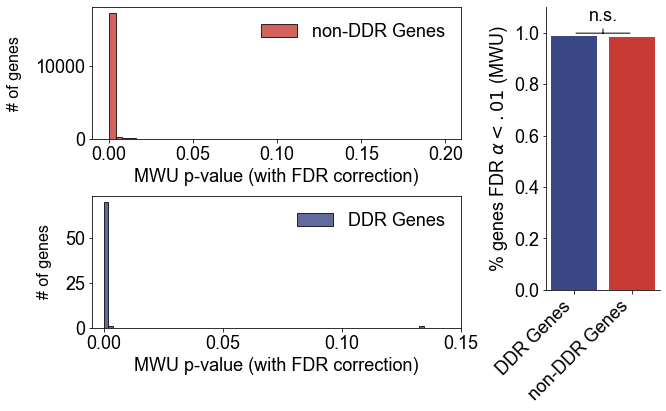

In [6]:
hist_outfile=os.path.join(graphics_dir,"MWU_pvals_comparison.pdf")

r=(200/255,58/255,52/255)
b=(58/255,71/255,133/255)

all_big_bets_drop_zero=all_big_bets.loc[all_big_bets['mwu_padj']!=0,:]
all_big_bets_drop_zero=all_big_bets.loc[all_big_bets['mwu_padj']<.2,:]

ddr_filt_only=all_big_bets_drop_zero.iloc[np.where(np.logical_not(all_big_bets_drop_zero['path'].isin(['None'])))[0],:]

f=plt.figure()
f.set_size_inches((9.5,6))

ncols=100
nrows=10
gs = gridspec.GridSpec(nrows, ncols, figure=f)

a=plt.subplot(gs[:int((nrows//2)*.95),:ncols-35])


a.hist(all_big_bets_drop_zero.loc[all_big_bets_drop_zero['path']=='None',:]['mwu_padj'],
       bins=50,alpha=.8,color=red,
       edgecolor='k',density=False,label='non-DDR Genes')
# a.set_xlim([-.005,.2])
a.set_ylabel("",fontsize=18,)
a.set_xlabel('MWU p-value (with FDR correction)',fontsize=18)
a.text(s="# of genes",y=.5,x=-.23,transform=a.transAxes,rotation=90,
       fontsize=16,verticalalignment='center')
a.legend(loc=1,fontsize=18,frameon=False)

logbins = np.logspace(np.log10(ddr_filt_only['mwu_padj'].min()),
                      np.log10(ddr_filt_only['mwu_padj'].max()),72)

a2 = plt.subplot(gs[nrows//2:int(nrows*.95),:ncols-35] )
a2.hist(ddr_filt_only['mwu_padj'],bins=72,alpha=.8,color=blue,
        edgecolor='k',density=False,label='DDR Genes')
a2.set_xlabel("MWU p-value (with FDR correction)",fontsize=18)
a2.text(s="# of genes",y=.5,x=-.15,transform=a2.transAxes,rotation=90,
        fontsize=16,verticalalignment='center')
a2.set_xlim([-.005,.15])

a2.legend(loc=1,fontsize=18,frameon=False)

top=int(.85*nrows)
a3=plt.subplot(gs[:top,-20:])

cont_tab=all_big_bets.groupby(['is_ddr','mwu_sig']).size().unstack()
per_tab=np.divide(cont_tab,np.sum(cont_tab,axis=1)[:,None])

a3.bar(x=[0,1],height=per_tab.loc[:,True],color=[blue,red],label='p<.05')


_,pval,_,_=stats.chi2_contingency(cont_tab)

print(pval)
if pval<.05:
    a3.annotate(s=r"p={:.3f}".format(pval),fontsize=18,xy=(.5,.9),xytext=(.5,.95),
           arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0', lw=1.0),
           xycoords='axes fraction',horizontalalignment='center',transform=a.transAxes)
else:
     a3.annotate(s=r"n.s.".format(pval),fontsize=18,xy=(.5,.9),xytext=(.5,.95),
           arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0', lw=1.0),
           xycoords='axes fraction',horizontalalignment='center',transform=a.transAxes)
     



# a3.yaxis.tick_right()

a3.set_xticks([0,1])
a3.set_xticklabels(['DDR Genes','non-DDR Genes'],fontsize=18,rotation=45,horizontalalignment='right')
a3.set_ylabel(r'% genes FDR $\alpha<.01$ (MWU)',fontsize=18)
a3.spines['right'].set_visible(False)
a3.spines['top'].set_visible(False)

# a3.legend(fontsize=20,loc=10,bbox_to_anchor=(1.07,.9))
# a3.set_title("% Significant: \nMWU",fontsize=20,fontweight='bold')
a3.set_ylim([0,1.1])

f.subplots_adjust(top=.98,right=.97,bottom=.15,left=.14,wspace=0,hspace=1)
f.savefig(hist_outfile,dpi=200)
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


0.7446304581893196


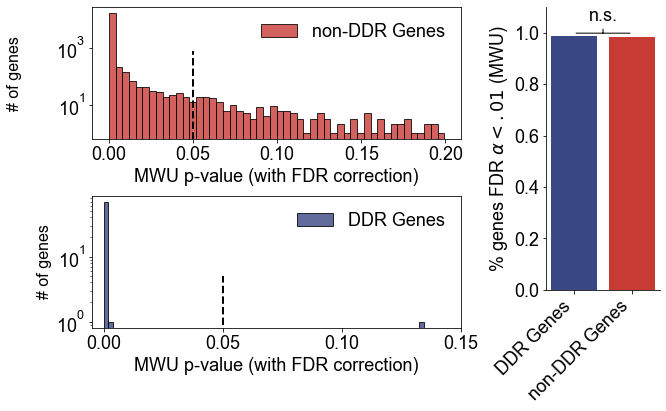

In [7]:
hist_outfile=os.path.join(graphics_dir,"MWU_pvals_logy_comparison.pdf")

r=(200/255,58/255,52/255)
b=(58/255,71/255,133/255)

all_big_bets_drop_zero=all_big_bets.loc[all_big_bets['mwu_padj']!=0,:]
all_big_bets_drop_zero=all_big_bets.loc[all_big_bets['mwu_padj']<.2,:]

ddr_filt_only=all_big_bets_drop_zero.iloc[np.where(np.logical_not(all_big_bets_drop_zero['path'].isin(['None'])))[0],:]

f=plt.figure()
f.set_size_inches((9.5,6))

ncols=100
nrows=10
gs = gridspec.GridSpec(nrows, ncols, figure=f)

a=plt.subplot(gs[:int((nrows//2)*.95),:ncols-35])


a.hist(all_big_bets_drop_zero.loc[all_big_bets_drop_zero['path']=='None',:]['mwu_padj'],
       bins=50,alpha=.8,color=red,
       edgecolor='k',density=False,label='non-DDR Genes')
# a.set_xlim([-.005,.2])
a.set_ylabel("",fontsize=18,)
a.set_xlabel('MWU p-value (with FDR correction)',fontsize=18)
a.text(s="# of genes",y=.5,x=-.23,transform=a.transAxes,rotation=90,
       fontsize=16,verticalalignment='center')
a.legend(loc=1,fontsize=18,frameon=False)
a.set_yscale('log')
a.vlines(x=.05,ymin=0,ymax=800,ls='--',lw=2,color='k')

logbins = np.logspace(np.log10(ddr_filt_only['mwu_padj'].min()),
                      np.log10(ddr_filt_only['mwu_padj'].max()),72)

a2 = plt.subplot(gs[nrows//2:int(nrows*.95),:ncols-35] )
a2.hist(ddr_filt_only['mwu_padj'],bins=72,alpha=.8,color=blue,
        edgecolor='k',density=False,label='DDR Genes')
a2.set_xlabel("MWU p-value (with FDR correction)",fontsize=18)
a2.text(s="# of genes",y=.5,x=-.15,transform=a2.transAxes,rotation=90,
        fontsize=16,verticalalignment='center')
a2.set_xlim([-.005,.15])
a2.set_yscale('log')
a2.legend(loc=1,fontsize=18,frameon=False)
a2.vlines(x=.05,ymin=0,ymax=5,ls='--',lw=2,color='k')

top=int(.85*nrows)
a3=plt.subplot(gs[:top,-20:])

cont_tab=all_big_bets.groupby(['is_ddr','mwu_sig']).size().unstack()
per_tab=np.divide(cont_tab,np.sum(cont_tab,axis=1)[:,None])

a3.bar(x=[0,1],height=per_tab.loc[:,True],color=[blue,red],label='p<.05')


_,pval,_,_=stats.chi2_contingency(cont_tab)

print(pval)
if pval<.05:
    a3.annotate(s=r"p={:.3f}".format(pval),fontsize=18,xy=(.5,.9),xytext=(.5,.95),
           arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0', lw=1.0),
           xycoords='axes fraction',horizontalalignment='center',transform=a.transAxes)
else:
     a3.annotate(s=r"n.s.".format(pval),fontsize=18,xy=(.5,.9),xytext=(.5,.95),
           arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0', lw=1.0),
           xycoords='axes fraction',horizontalalignment='center',transform=a.transAxes)
     



# a3.yaxis.tick_right()

a3.set_xticks([0,1])
a3.set_xticklabels(['DDR Genes','non-DDR Genes'],fontsize=18,rotation=45,horizontalalignment='right')
a3.set_ylabel(r'% genes FDR $\alpha<.01$ (MWU)',fontsize=18)
a3.spines['right'].set_visible(False)
a3.spines['top'].set_visible(False)

# a3.legend(fontsize=20,loc=10,bbox_to_anchor=(1.07,.9))
# a3.set_title("% Significant: \nMWU",fontsize=20,fontweight='bold')
a3.set_ylim([0,1.1])

f.subplots_adjust(top=.98,right=.97,bottom=.15,left=.14,wspace=0,hspace=1)
f.savefig(hist_outfile,dpi=200)
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:52: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


0.7446821317053232


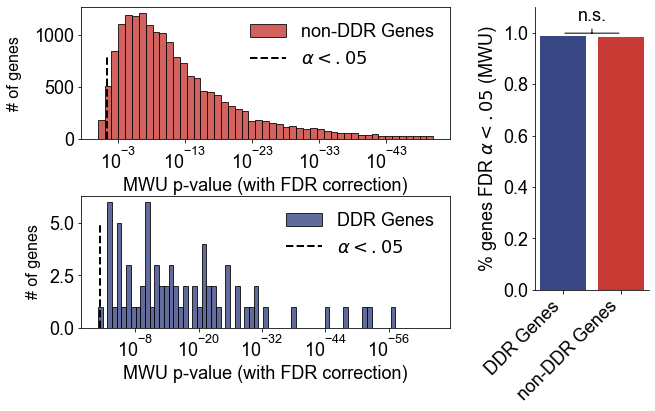

In [52]:
hist_outfile=os.path.join(graphics_dir,"R1_Figure_1A+B_MWU_pvals_comparison_logscale.pdf")

r=(200/255,58/255,52/255)
b=(58/255,71/255,133/255)

all_big_bets_drop_zero=all_big_bets.loc[all_big_bets['mwu_padj']!=0,:]
ddr_filt_only=all_big_bets_drop_zero.iloc[np.where(np.logical_not(all_big_bets_drop_zero['path'].isin(['None'])))[0],:]

f=plt.figure()
f.set_size_inches((9.5,6))

ncols=100
nrows=10
gs = gridspec.GridSpec(nrows, ncols, figure=f)

a=plt.subplot(gs[:int((nrows//2)*.95),:ncols-35])


logbins = np.logspace(-50.0,
                      np.log10(all_big_bets_drop_zero['mwu_padj'].max()),50)

a.hist(all_big_bets_drop_zero.loc[all_big_bets_drop_zero['path']=='None',:]['mwu_padj'],
       bins=logbins,alpha=.8,color=red,
       edgecolor='k',density=False,label='non-DDR Genes')
a.set_xscale('log')
a.set_ylabel("",fontsize=18,)
a.set_xlabel('MWU p-value (with FDR correction)',fontsize=18)
a.text(s="# of genes",y=.5,x=-.2,transform=a.transAxes,rotation=90,
       fontsize=16,verticalalignment='center')
a.vlines(x=.05,ymin=0,ymax=800,ls='--',lw=2,color='k',label=r'$\alpha<.05$')

a.legend(loc=1,fontsize=18,frameon=False)
a.invert_xaxis()
logbins = np.logspace(np.log10(ddr_filt_only['mwu_padj'].min()),
                      np.log10(ddr_filt_only['mwu_padj'].max()),72)

a2 = plt.subplot(gs[nrows//2:int(nrows*.95),:ncols-35] )
a2.hist(ddr_filt_only['mwu_padj'],bins=logbins,alpha=.8,color=blue,
        edgecolor='k',density=False,label='DDR Genes')
a2.set_xlabel("MWU p-value (with FDR correction)",fontsize=18)
a2.text(s="# of genes",y=.5,x=-.15,transform=a2.transAxes,rotation=90,
        fontsize=16,verticalalignment='center')
a2.set_xscale('log')
a2.vlines(x=.05,ymin=0,ymax=5,ls='--',lw=2,color='k',label=r'$\alpha<.05$')
a2.legend(loc=1,fontsize=18,frameon=False)
a2.invert_xaxis()

top=int(.85*nrows)
a3=plt.subplot(gs[:top,-20:])

cont_tab=all_big_bets_drop_zero.groupby(['is_ddr','mwu_sig']).size().unstack()
per_tab=np.divide(cont_tab,np.sum(cont_tab,axis=1)[:,None])

a3.bar(x=[0,1],height=per_tab.loc[:,True],color=[blue,red],label='p<.05')


_,pval,_,_=stats.chi2_contingency(cont_tab)

print(pval)
if pval<.05:
    a3.annotate(s=r"p={:.3f}".format(pval),fontsize=18,xy=(.5,.9),xytext=(.5,.95),
           arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0', lw=1.0),
           xycoords='axes fraction',horizontalalignment='center',transform=a.transAxes)
else:
     a3.annotate(s=r"n.s.".format(pval),fontsize=18,xy=(.5,.9),xytext=(.5,.95),
           arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0', lw=1.0),
           xycoords='axes fraction',horizontalalignment='center',transform=a.transAxes)
     



# a3.yaxis.tick_right()

a3.set_xticks([0,1])
a3.set_xticklabels(['DDR Genes','non-DDR Genes'],fontsize=18,rotation=45,horizontalalignment='right')
a3.set_ylabel(r'% genes FDR $\alpha<.05$ (MWU)',fontsize=18)
a3.spines['right'].set_visible(False)
a3.spines['top'].set_visible(False)

# a3.legend(fontsize=20,loc=10,bbox_to_anchor=(1.07,.9))
# a3.set_title("% Significant: \nMWU",fontsize=20,fontweight='bold')
a3.set_ylim([0,1.1])

f.subplots_adjust(top=.98,right=.97,bottom=.15,left=.14,wspace=0,hspace=1)
f.savefig(hist_outfile,dpi=200)
plt.show()

In [10]:

#collect mutation rates and TMB
def get_median_sample_tmb_genes(df,snv_indels_df):
    tmbs=snv_indels_df.loc[df.index,'tmb']
    gene_medians=df.apply(lambda x: np.mean(tmbs.iloc[np.where(x>0)[0]].dropna()),axis=0)
    return gene_medians



gene_median_tmb_tcga=get_median_sample_tmb_genes(tcga_spec_by_genes_wmod,tcga_snv_indel_df)
tcga_all_mutrates=np.sum(tcga_spec_by_genes_wmod,axis=0)/(tcga_spec_by_genes_wmod.shape[0])
sizes=np.sum(tcga_spec_by_genes_wmod,axis=0)

mutrate_tmb_tcga=pd.DataFrame([tcga_all_mutrates,gene_median_tmb_tcga,sizes],index=['mutrate','medtmb','size']).T
mutrate_tmb_tcga['ddr_path']=list(map(lambda x: ddr_obj.gene_2_path_dict.get(x,['None'])[0],mutrate_tmb_tcga.index.values))
paths=list(set([v[0] for v in ddr_obj.gene_2_path_dict.values()]))
cols=sbn.color_palette('Set1',n_colors=len(paths))
path2coldict=dict(zip(paths,cols))
mutrate_tmb_tcga['ddr_col']=mutrate_tmb_tcga['ddr_path'].apply(lambda x :path2coldict.get(x,(0,0,0,1)) )
mutrate_tmb_tcga_ddr=mutrate_tmb_tcga.iloc[np.where(mutrate_tmb_tcga['ddr_path']!='None')[0],:]
mutrate_tmb_tcga['log10medtmb']=np.log10(mutrate_tmb_tcga['medtmb'])
mutrate_tmb_tcga['isDDR']=mutrate_tmb_tcga['ddr_path'].apply(lambda x: 'nonDDR' if x=='None' else 'DDR')



xlower=np.power(10.0,-3.0)
mutrate_tmb_tcga_filt=mutrate_tmb_tcga.iloc[np.where(mutrate_tmb_tcga['mutrate']>xlower)[0],:]

# mutrate_tmb_tcga_ddr_only_filt=mutrate_tmb_tcga.iloc[np.where(mutrate_tmb_tcga.index.isin(ddr_gene_df.index))[0],:]



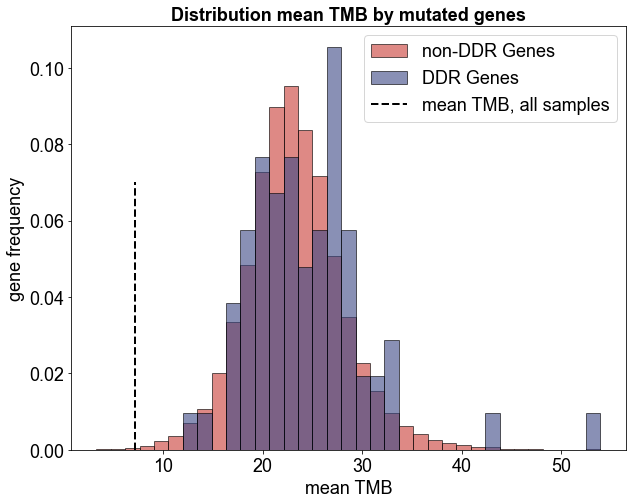

In [11]:
plt.close()


f,a=plt.subplots(1,1,figsize=(10,7))
outfile=os.path.join(graphics_dir,"R1_Figure_1D_median_tmb_distribution.pdf")
a=plt.subplot(1,1,1)

# Leg1=Legend(a, leg1, paths, bbox_to_anchor=(1.05, 1),loc=0)
a.set_title("Distribution mean TMB by mutated genes",fontsize=18,fontweight='bold')
# a.add_artist(Leg1)
a.set_xlabel("mean TMB",fontsize=18)
a.set_ylabel("gene frequency",fontsize=18)


mhist=a.hist(mutrate_tmb_tcga_filt['medtmb'],color=red,label='non-DDR Genes',
             edgecolor='k',alpha=.6,bins=35,density=True)
a.hist(mutrate_tmb_tcga_ddr['medtmb'],color=blue,label='DDR Genes',
             edgecolor='k',alpha=.6,density=True,bins=mhist[1])
a.vlines(x=np.mean(tcga_snv_indel_df['tmb'].dropna()),color='k',
         ymin=0,ymax=.07,linestyle='--',linewidth=2,label='mean TMB, all samples')

a.legend(fontsize=18)
# f.subplots_adjust(top=.94,bottom=.05,right=.99,left=.04)
f.subplots_adjust(top=.945,right=.88,bottom=.105,left=.11)
# a.set_xlim([-1,60])
f.savefig(outfile)
plt.show()

In [117]:
print(np.mean(tcga_snv_indel_df.loc[tcga_data.tcga_spec_by_all_genes_wmod.index,'tmb']))
print(mutrate_tmb_tcga_filt.groupby(['isDDR'])['medtmb'].mean())

5.188318553576503
isDDR
DDR       24.085096
nonDDR    23.200530
Name: medtmb, dtype: float64


DDR vs. nonDDR: Mann-Whitney-Wilcoxon test two-sided, P_val:1.485e-01 U_stat=6.412e+05


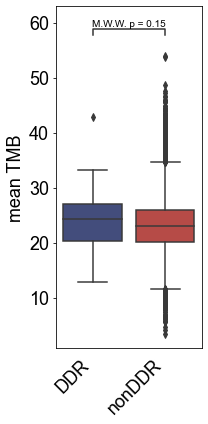

In [12]:
outfile=os.path.join(graphics_dir,"R1_Figure_1C_med_tmb_boxplot_DDRcomparison_tcga.pdf")
plt.close()
f,a=plt.subplots(1,1,figsize=(3,6))
leg1=[]
order=['DDR','nonDDR']
a=plt.subplot(1,1,1)
plotkw={'y':'medtmb','x':'isDDR','data':mutrate_tmb_tcga_filt,
        'order':order}
sbn.boxplot(data=mutrate_tmb_tcga_filt,y='medtmb',x='isDDR',ax=a,palette=[blue,red],order=order)
annotator = Annotator(a,pairs=[('nonDDR','DDR')], **plotkw)
annotator.configure(test="Mann-Whitney",text_format='simple')
annotator.apply_and_annotate()

# a.set_ylim([0,150])

a.set_xlabel('')
a.set_ylabel('mean TMB',fontsize=18)

plt.setp(a.get_xticklabels(), fontsize=18)
a.xaxis.set_tick_params(width=0)

for t in a.get_xticklabels():
    t.set_rotation(45)
    t.set_horizontalalignment('right')

f.tight_layout()
f.savefig(outfile)
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:43: 

mwu_sig     False     True 
is_ddr                     
DDR      0.013889  0.986111
non DDR  0.016031  0.983969
bigbets_sig     False     True 
is_ddr                         
DDR          0.972222  0.027778
non DDR      0.991461  0.008539


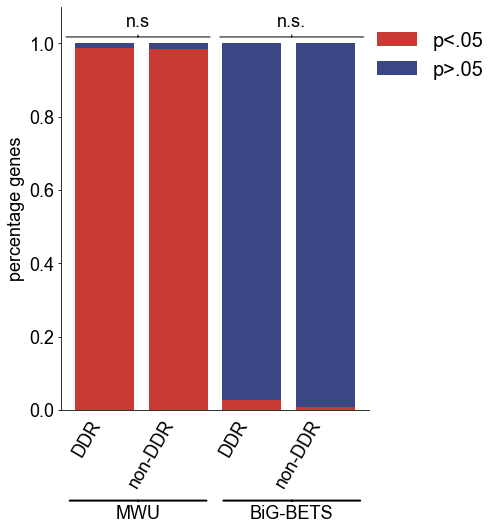

In [13]:
mwu_sig_comparison=os.path.join(graphics_dir,'R1_Figure_2A_mwu_sig_barplot.pdf')

cont_tab=all_big_bets.groupby(['is_ddr','mwu_sig']).size().unstack()

per_tab=np.divide(cont_tab,np.sum(cont_tab,axis=1)[:,None])

# per_tab

plt.close()
f,a=plt.subplots(1,1,figsize=(7,7))
a.bar(x=[0,1],height=per_tab.loc[:,True],color=red,label='p<.05')
a.bar(x=[0,1],height=per_tab.loc[:,False],color=blue,bottom=per_tab.loc[:,True],label='p>.05')
print(per_tab)


_,pval,_,_=stats.chi2_contingency(cont_tab)
# _,pval=stats.fisher_exact(cont_tab,alternative='two-sided')

# a.text(s='p={:.3f}'.format(pval),fontsize=20,
#        y=.95,x=.25,horizontalalignment='center',transform=a.transAxes)
if pval<.05:
    a.annotate(s='p={:.2f}'.format(pval),fontsize=18,xy=(.25,.92),xytext=(.25,.95),
           arrowprops=dict(arrowstyle='-[, widthB=4.0, lengthB=0', lw=1.0),
           xycoords='axes fraction',horizontalalignment='center',transform=a.transAxes)
else:
    a.annotate(s='n.s',fontsize=18,xy=(.25,.92),xytext=(.25,.95),
           arrowprops=dict(arrowstyle='-[, widthB=4.0, lengthB=0', lw=1.0),
           xycoords='axes fraction',horizontalalignment='center',transform=a.transAxes)

cont_tab=all_big_bets.groupby(['is_ddr','bigbets_sig']).size().unstack()
per_tab=np.divide(cont_tab,np.sum(cont_tab,axis=1)[:,None])
print(per_tab)
# per_tab

a.bar(x=[2,3],height=per_tab.loc[:,True],color=red)
a.bar(x=[2,3],height=per_tab.loc[:,False],color=blue,bottom=per_tab.loc[:,True])

a.annotate(s='MWU',xy=(.25,-.22),
           xytext=(.25,-.28),
#            bbox=dict(boxstyle='square',fc='white'), 
         fontsize=18, ha='center', va='bottom',
           arrowprops=dict(arrowstyle='-[, widthB=3.80, lengthB=0', lw=2.0),
           xycoords='axes fraction')

a.annotate(s='BiG-BETS',xy=(.75,-.22),
           xytext=(.75,-.28),
#            bbox=dict(boxstyle='square',fc='white'), 
         fontsize=18, ha='center', va='bottom',
           arrowprops=dict(arrowstyle='-[, widthB=3.80, lengthB=0', lw=2.0),
           xycoords='axes fraction')

a.set_xticks([0,1,2,3])
# a.set_xticklabels(['DDR','all genes','DDR','all genes'],fontsize=14)
a.set_xticklabels(['DDR','non-DDR','DDR','non-DDR'],fontsize=14)
for tick in a.get_xticklabels():
    tick.set_rotation(60)
    tick.set_horizontalalignment('right')
    tick.set_fontsize(18)
a.xaxis.set_tick_params(width=0)
a.spines['right'].set_visible(False)
a.spines['top'].set_visible(False)

a.legend(fontsize=20,loc=10,bbox_to_anchor=(1.2,.88),frameon=False)
# a.set_title("Percent Significance: MWU vs Network-Test",fontsize=20,fontweight='bold')
a.set_ylim([0,1.1])
# _,pval,_,_=stats.chi2_contingency(cont_tab)
_,pval=stats.fisher_exact(cont_tab,alternative='two-sided')

a.set_ylabel("percentage genes",fontsize=18)

if pval<.05:
    a.annotate(s='p={:.3f}'.format(pval),fontsize=18,xy=(.75,.92),xytext=(.75,.95),
       arrowprops=dict(arrowstyle='-[, widthB=4.0, lengthB=0', lw=1.0),
       xycoords='axes fraction',horizontalalignment='center',transform=a.transAxes)
else:
    a.annotate(s='n.s.',fontsize=18,xy=(.75,.92),xytext=(.75,.95),
       arrowprops=dict(arrowstyle='-[, widthB=4.0, lengthB=0', lw=1.0),
       xycoords='axes fraction',horizontalalignment='center',transform=a.transAxes)

# a.text(s='p={:.3f}'.format(pval),fontsize=20,
#        y=.95,x=.75,horizontalalignment='center',transform=a.transAxes)

f.subplots_adjust(top=.97,right=.73,left=.12,bottom=.17)
f.savefig(mwu_sig_comparison,dpi=200)
plt.show()
# cont_tab

# Pathway level BiG-BET scores

In [14]:
# combined pathway level individual runs
combined_path_data={}

# load individual runs
# smaller_runs_dir=os.path.join(bigbets.file_locations.bipartite_samples_dir,"sampled_data/tcga_all_genes_high/smaller_runs_300")
smaller_runs_dir=os.path.join(bigbets.file_locations.bipartite_samples_dir,"sampled_data/tcga_all_genes_moderate_high/smaller_runs_300")

data_files_path=[ os.path.join(smaller_runs_dir,f) for f in os.listdir(smaller_runs_dir) if re.search("path.pickle",f)]

#we keep track of the mean tmb for each gene and each sample across all runs
combined_cdfs_tmbs={}
combined_mean_tmbs={}
# ind2keep=drop_leading_inds(200,8,20)
for i,file in enumerate(data_files_path):
    print(i)
    with gzip.open(file,'rb') as fh:
        cdata=pickle.load(fh)
    for path in cdata.keys():
        print(path,end=', ')
        all_x,all_ecdf=cdata.loc[path]
        cmean_tmbs=[np.mean(x) for x in all_x] 
        combined_mean_tmbs[path]=combined_mean_tmbs.get(path,[])+cmean_tmbs
        if i==0:
            combined_cdfs_tmbs[path]=(np.array(all_x),np.array(all_ecdf))
        else:
            cur_comb_all_x,cur_comb_ecdf=combined_cdfs_tmbs[path]
            combined_cdfs_tmbs[path]=(np.concatenate([cur_comb_all_x,all_x],axis=0),
                                      np.concatenate([cur_comb_ecdf,np.array(all_ecdf)]))
    del cdata
    print()
    
all_ind=tcga_data.tcga_spec_by_all_genes_wmod.index
array2use=tcga_data.tcga_spec_by_all_genes_wmod
snv_df=tcga_data.tcga_snv_indel_df


ddr_path_bigbets=pd.DataFrame()
for path in combined_mean_tmbs.keys():
    mean_tmbs=combined_mean_tmbs[path]
    genes=ddr_obj.path_2_genes_dict[path]
    ctmbs=bigbets.bipartite_helper_functions.get_tmb_values_genes(genes,array2use,snv_indel_df=snv_df)
    ctmbs=ctmbs.to_frame(name='tmb')
    ctmbs['sample']=ctmbs.index
    ctmbs['path']=path
    ctmbs.index=np.arange(ctmbs.shape[0])
#     path_tmb_vals=pd.concat([path_tmb_vals,ctmbs])
    ddr_path_bigbets.loc[path,['MWU_stat','MWU_pval']]=bigbets.bipartite_helper_functions.cal_mwu_pval(genes,array2use,
                                                              outgroup=all_ind,
                                                              snv_indel_df=snv_df)
    obs_mean_tmb=np.mean(np.log1p(ctmbs['tmb']))
    zscore=stats.mstats.zscore(np.append(mean_tmbs,obs_mean_tmb))[-1]
    ddr_path_bigbets.loc[path,'bigbets']=zscore
    ddr_path_bigbets.loc[path,'path']=path

ddr_path_bigbets['-1og10_MWU']=-1*np.log10(ddr_path_bigbets['MWU_pval'])
ddr_path_bigbets['pval_bigbets']=stats.norm.sf(abs(ddr_path_bigbets['bigbets'])) #one-sided
_,ddr_path_bigbets['padj_tcga'],_,_ = sm.stats.multipletests(alpha=.05,pvals=ddr_path_bigbets['pval_bigbets'],method='fdr_bh')

ddr_path_bigbets.to_csv(os.path.join(bigbets.file_locations.bipartite_samples_dir,'tcga_allgenes_high_moderate_path_rewiring_zscores.csv'))


0
BER, NER, MMR, FA, HR, NHEJ, DS, histone_modification_pathway, chromatin_remodel, 
1
BER, NER, MMR, FA, HR, NHEJ, DS, histone_modification_pathway, chromatin_remodel, 


In [75]:
ddr_path_bigbets

,MWU_stat,MWU_pval,bigbets,path,-1og10_MWU,pval_bigbets,padj_tcga
BER,1916538.0,4.536747e-58,-0.361272,BER,57.343255,3.589480e-01,3.590322e-01
NER,4673083.0,8.847646e-139,2.219984,NER,138.053172,1.320992e-02,1.981487e-02
MMR,4445419.0,5.792274e-148,3.036355,MMR,147.237151,1.197286e-03,2.693893e-03
FA,3553288.5,7.307889e-96,-1.521519,FA,95.136208,6.406478e-02,8.236900e-02
HR,8297913.5,7.060999e-192,-2.492552,HR,191.151134,6.341434e-03,1.141458e-02
NHEJ,4128436.5,1.373393e-120,0.361047,NHEJ,119.862205,3.590322e-01,3.590322e-01
DS,6513473.0,1.036218e-144,-4.239700,DS,143.984549,1.119091e-05,3.357273e-05
histone_modification_pathway,33991289.0,1.785432e-189,-10.334884,histone_modification_pathway,188.748257,2.450011e-25,1.102505e-24
chromatin_remodel,36053740.5,1.159516e-158,-13.472730,chromatin_remodel,157.935723,1.131703e-41,1.018533e-40


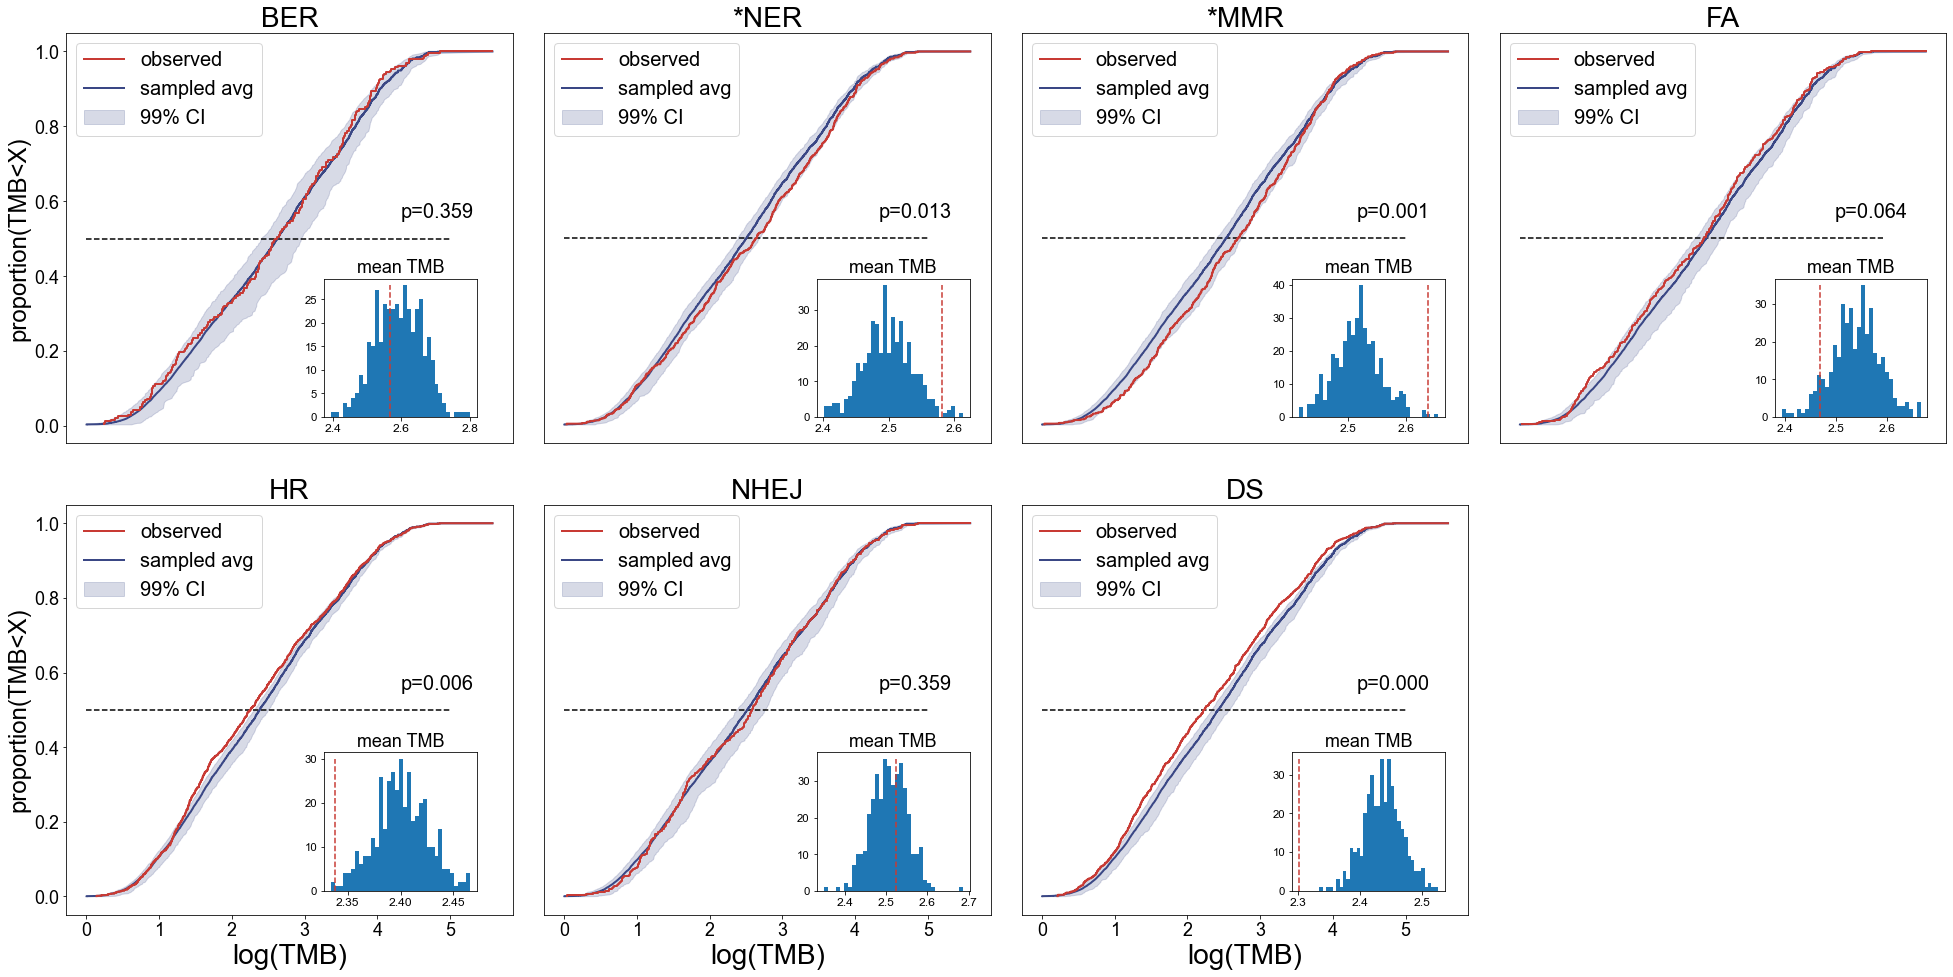

In [78]:
# outfile=os.path.join(graphics_dir,"tcga_path_rewiring_distribution_allgenes.png")
outfile=os.path.join(graphics_dir,'R1_Figure_2C_tcga_path_rewiring_distributions_allgenes.pdf')

array=tcga_data.tcga_spec_by_all_genes_wmod
data2use=combined_cdfs_tmbs
pathways2use=['BER', 'NER', 'MMR', 'FA', 'HR', 'NHEJ', 'DS']

f,a=plt.subplots(2,4,figsize=(28,14))

#adjusting position of the embedded figures ( these get changed with subplots_adjust)
rects=[[.3,.05,.45,.4],[.55,.05,.45,.4],[.75,.05,.45,.4],[.97,.05,.45,.4],
      [.3,-.12,.45,.4],[.55,-.12,.45,.4],[.75,-.12,.45,.4]]

for ii,ind in enumerate(pathways2use):
    a=plt.subplot(2,4,ii+1)
    all_x,all_ecdf=data2use[ind]
    x_cat, mean_ecdf, ecdf_lower, ecdf_upper = bigbets.bipartite_helper_functions.get_ecdf_upper_lower(all_x, all_ecdf)
#     gene=array.columns[ind]
    genes=ddr_obj.path_2_genes_dict[ind]
    x1,ecdf1=bigbets.bipartite_helper_functions.get_ecdf_tmb_df(genes=genes,df=array,
                                              snv_indel_df=tcga_snv_indel_df)

    a.step(x1, ecdf1, color=red, label='observed', zorder=3, linewidth=2)
    a.hlines(y=.5, xmin=0, xmax=5, linestyle='--',color='k')
    #     a.plot(x,ecdf,color='g',label='all')
    a.step(x_cat, mean_ecdf, color=blue, label='sampled avg', linewidth=2)
    # a.set_title("{:}({:d} genes / {:d} samples)".format(path, len(path_ind), nsamps), fontsize=20,
    #             fontweight='bold')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    a2=bigbets.bipartite_helper_functions.add_subplot_axes(ax=a,rect=rects[ii])
    a2.set_title("mean TMB",fontsize=18)
    med_tmbs=[]
    for i, x_s in enumerate(all_x):
#         a.step(x_s, all_ecdf[i], color='b', alpha=.05)
        med_tmbs.append(np.mean(x_s))

    zscore=stats.mstats.zscore(a=np.append(med_tmbs,np.mean(x1)))[-1]
    a.fill_between(x_cat, ecdf_lower,ecdf_upper,color=blue,alpha=.2,label='99% CI')

    y, x, _ =a2.hist(med_tmbs,bins=35)
    a2.vlines(x=np.mean(x1),ymin=0,ymax=y.max(),color=red,linestyle='--')
    if zscore > 1.96:
        a.set_title("*{}".format(ind), fontsize=28)
    else:
        a.set_title("{}".format(ind), fontsize=28)
    if ii in [4,5,6]:
        a.set_xlabel("log(TMB)", fontsize=28)
    else:
        a.set_xlabel("")
        a.set_xticks([])
    
    if ii not in [0,4]:
        a.set_yticks([])
    else:
        a.set_ylabel('proportion(TMB<X)',fontsize=24)

    a.text(s="p={:.3f}".format(ddr_path_bigbets.loc[ind,'pval_bigbets']),
          x=.75,y=.55,transform=a.transAxes,fontsize=20)
    #     a.set_xlim([0,.1])
    a.legend(fontsize=20)
    # true_vals = get_ecdf_tmb(indarray,snv_indels_df=snv_indels_df)


#     xlabs=[ x.get_text() for x in list(a.get_xticklabels())]
#     ylabs=[ x.get_text() for x in list(a.get_yticklabels())]
#     a.set_xticklabels(xlabs,fontsize=18)
#     a.set_yticklabels(ylabs,fontsize=18)

    # a.hist(data2use.iloc[ind,:].values,bins=35)
    # a.vlines(x=true_val[ind],ymin=0,ymax=4,linestyle='--')
# f.suptitle('DDR Pathways',fontsize=24,fontweight='bold',x=.5,y=.985,
#            transform=f.transFigure)
# f.tight_layout()

plt.subplot(2,4,8).set_visible(False)

f.subplots_adjust(top=.935,bottom=.06,right=.98,left=.0475,wspace=.07,hspace=.15)
f.savefig(outfile,dpi=200)
plt.show()

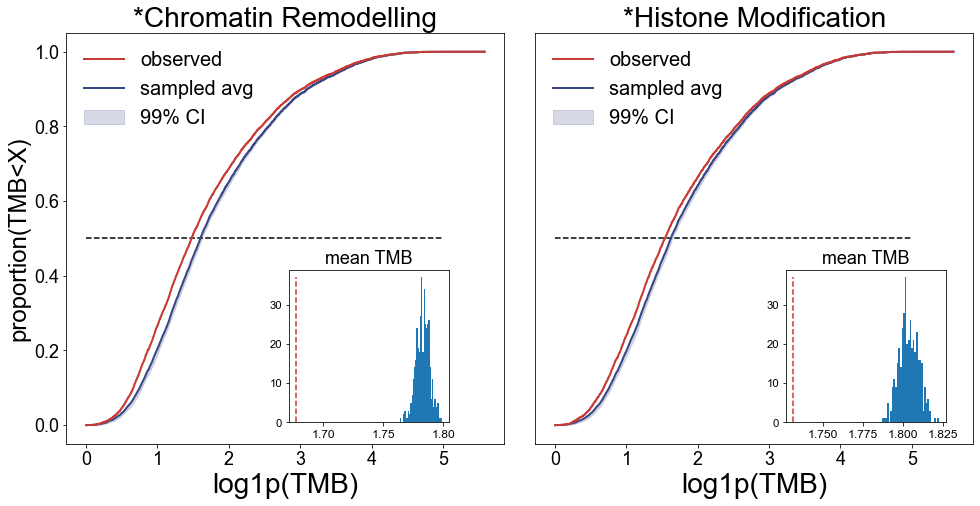

In [16]:
# outfile=os.path.join(graphics_dir,"tcga_path_rewiring_distribution_allgenes.png")
outfile=os.path.join(supplements_dir,'tcga_chromatin_histone_rewiring_distributions_allgenes.pdf')

array=tcga_data.tcga_spec_by_all_genes_wmod
data2use=combined_cdfs_tmbs
pathways2use=['chromatin_remodel', 'histone_modification_pathway']
names=['Chromatin Remodelling','Histone Modification']

f,a=plt.subplots(1,2,figsize=(14,7))

#adjusting position of the embedded figures ( these get changed with subplots_adjust)
rects=[[.5,0.05,.45,.4],[.7,.05,.45,.4],[.75,.05,.45,.4],[.97,.05,.45,.4],
      [.27,-.1,.45,.4],[.55,-.1,.45,.4],[.8,-.15,.45,.4]]

for ii,ind in enumerate(pathways2use):
    a=plt.subplot(1,2,ii+1)
    all_x,all_ecdf=data2use[ind]
    x_cat, mean_ecdf, ecdf_lower, ecdf_upper = bigbets.bipartite_helper_functions.get_ecdf_upper_lower(all_x, all_ecdf)
#     gene=array.columns[ind]
    genes=ddr_obj.path_2_genes_dict[ind]
    x1,ecdf1=bigbets.bipartite_helper_functions.get_ecdf_tmb_df(genes=genes,df=array,
                                              snv_indel_df=tcga_snv_indel_df)

    a.step(x1, ecdf1, color=red, label='observed', zorder=3, linewidth=2)
    a.hlines(y=.5, xmin=0, xmax=5, linestyle='--',color='k')
    #     a.plot(x,ecdf,color='g',label='all')
    a.step(x_cat, mean_ecdf, color=blue, label='sampled avg', linewidth=2)
    # a.set_title("{:}({:d} genes / {:d} samples)".format(path, len(path_ind), nsamps), fontsize=20,
    #             fontweight='bold')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    a2=bigbets.bipartite_helper_functions.add_subplot_axes(ax=a,rect=rects[ii])
    a2.set_title("mean TMB",fontsize=18)
    med_tmbs=[]
    for i, x_s in enumerate(all_x):
#         a.step(x_s, all_ecdf[i], color='b', alpha=.05)
        med_tmbs.append(np.mean(x_s))

    zscore=stats.mstats.zscore(a=np.append(med_tmbs,np.mean(x1)))[-1]
    a.fill_between(x_cat, ecdf_lower,ecdf_upper,color=blue,alpha=.2,label='99% CI')

    y, x, _ =a2.hist(med_tmbs,bins=35)
    a2.vlines(x=np.mean(x1),ymin=0,ymax=y.max(),color=red,linestyle='--')
    if zscore < 1.96:
        a.set_title("*{}".format(names[ii]), fontsize=28)
    else:
        a.set_title("{}".format(names[ii]), fontsize=28)
        
  
    a.set_xlabel("log1p(TMB)", fontsize=28)
    
    if ii not in [0]:
        a.set_yticks([])
    else:
        a.set_ylabel('proportion(TMB<X)',fontsize=24)

    a.legend(fontsize=20,loc=2,frameon=False)


f.subplots_adjust(top=.935,bottom=.12,right=.98,left=.08,wspace=.07,hspace=.15)
f.savefig(outfile,dpi=200)
plt.show()

## Histogram of DDR BigBET scores 

In [17]:
ddr_filt_only.sort_values(by='bigbets')

,gene_mut_cnt,obs_tmb,mean,std,upper,lower,bigbets,mwu_U,mwu_pval,path,pval_bigbets,padj_bigbets,bigbets_sig,mwu_padj,mwu_sig,-log10_padj,is_ddr
ATM,347.0,2.271105,2.515052,0.053488,2.619889,2.410216,-4.441342,2628508.0,6.491384e-55,DS,0.000004,0.001314,True,3.163074e-53,True,52.499891,DDR
BRCA1,138.0,2.290750,2.586283,0.089751,2.762194,2.410371,-3.245136,1088658.5,3.137932e-29,HR,0.000587,0.062556,False,3.239981e-28,True,27.489457,DDR
BRCA2,233.0,2.380525,2.562554,0.071142,2.701991,2.423116,-2.534878,1828894.0,2.824683e-46,HR,0.005624,0.175811,False,8.536819e-45,True,44.068704,DDR
CHEK2,77.0,2.332763,2.615548,0.120958,2.852627,2.378470,-2.319203,593556.5,2.535540e-15,DS,0.010192,0.215422,False,7.874521e-15,True,14.103776,DDR
RAD52,15.0,2.021211,2.660220,0.293317,3.235121,2.085319,-2.163079,113287.5,5.601431e-04,HR,0.015268,0.245620,False,6.174720e-04,True,3.209383,DDR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POLE3,12.0,3.450221,2.660159,0.340391,3.327326,1.992992,2.302729,113559.0,1.174773e-07,NER,0.010647,0.217182,False,1.721123e-07,True,6.764188,DDR
PALB2,66.0,2.932159,2.629141,0.125524,2.875169,2.383113,2.393673,592972.5,2.391439e-27,HR,0.008340,0.203127,False,2.148994e-26,True,25.667765,DDR
MSH3,79.0,2.927208,2.622058,0.124813,2.866690,2.377425,2.423822,703913.5,3.623082e-31,MMR,0.007679,0.196808,False,4.281910e-30,True,29.368363,DDR
MLH1,77.0,3.032767,2.632613,0.136767,2.900676,2.364550,2.891458,697155.5,1.308635e-32,MMR,0.001917,0.109652,False,1.716959e-31,True,30.765240,DDR


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


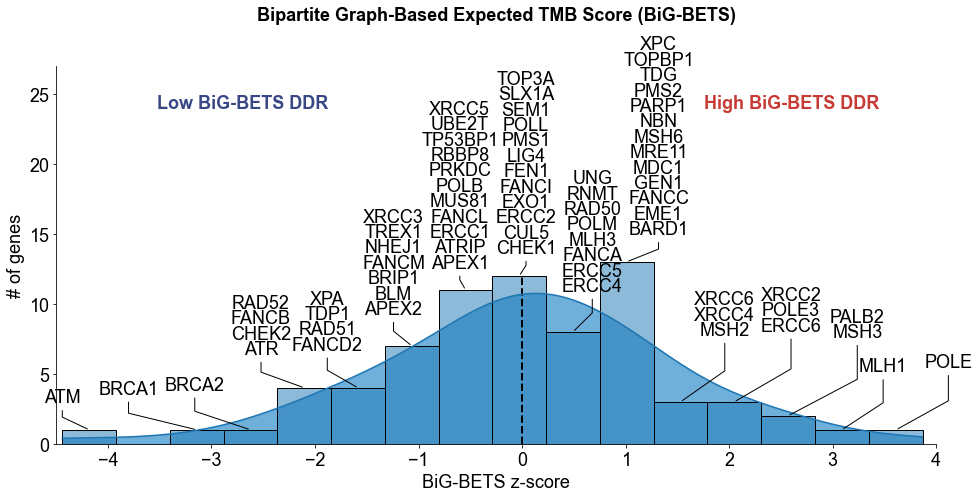

In [18]:
# outfile=os.path.join(graphics_dir,'dist_zscores_ddr_genes.png')
outfile=os.path.join(graphics_dir,'R1_Figure_2B_dist_zscore_ddr_genes.pdf')

ddr_filt_only=all_big_bets.iloc[np.where(np.logical_not(all_big_bets['path'].isin(['None'])))[0],:]

low_ddr_genes=ddr_filt_only.index[ddr_filt_only['bigbets']<0]
high_ddr_genes=ddr_filt_only.index[ddr_filt_only['bigbets']>0]

plt.close()
# f,a=plt.subplots(1,1,figsize=(14,7))
# a.hist(ddr_filt_only['bigbets'],bins=12)
nbins=16
dpplt=sbn.displot(ddr_filt_only['bigbets'],kde=True,bins=nbins)
# dpplt=sbn.displot(ddr_filt_only['bigbets'],kind='kde',ax=a)

a=dpplt.axes[0][0]

l2=dpplt.axes[0][0].lines[0]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
a.fill_between(x2,y2, color=(75/255,156/255,211/255), alpha=0.8)
for p in a.patches:
    p.set_visible(True)
f=plt.gcf()
f.set_size_inches((14,7))
a.vlines(x=0,ymin=0,ymax=12,linestyle='--',linewidth=2,color='k')
a.set_ylim([0,27])
a.set_xlim([-4.5,4])

a.set_xlabel("BiG-BETS z-score",fontsize=18)
a.set_ylabel("# of genes",fontsize=18)

cnts,bins=np.histogram(ddr_filt_only['bigbets'],bins=nbins,)
bins[-1]+=.01
bin_mems=[ [] for i in range(len(cnts))]
for i, val in enumerate(np.digitize(ddr_filt_only['bigbets'],bins,)-1):
    bin_mems[val]+=[ddr_filt_only.index[i]]
    
cum_tot=0
non_zero=0
xlims=a.get_xlim()
ylims=a.get_ylim()
ratio=((ylims[1]-ylims[0])*14)/((xlims[1]-xlims[0])*7)

for i,val in enumerate(cnts):
#     cmems=members[cum_tot:cum_tot+val]
    cmems=bin_mems[i]
#     bin_mems.append([members[cum_tot:cum_tot+val]])
    xcoord=(bins[i]+bins[i+1])/2

    xtext=bins[0]+non_zero*(1.03)*(bins[-1]+1-bins[0])/np.sum(cnts>0)
    
    if i>=len(cnts)-2:
        xtext+=(-.25-.01*i)
    
    for ii,gene in enumerate(cmems):
        ytext=cnts[i]*.75+1.1*ii+i*.3+2.2
        if i>=len(cnts)-2:
            ytext-=2
        if ii>0:
            a.text(y=ytext,x=xtext,s=gene,horizontalalignment='center',fontsize=18)
        else:
            alength=.6*(ytext-cnts[i])
            dist2cent=(xcoord-xtext)*ratio
            angle=-360/(2*np.pi)*np.arctan((ytext-cnts[i]-alength)/(dist2cent))
#

            constr='angle,angleA=-90,angleB={:.2f},rad=0'.format(angle)
#             constr='bar,angle=180,fraction=.4'

            a.annotate(s=gene,fontsize=18,xy=(xcoord,cnts[i]),xytext=(xtext,ytext),
               arrowprops=dict(arrowstyle='-',
                               connectionstyle=constr,lw=1.0),
               xycoords='data',horizontalalignment='center')
    cum_tot+=val
    non_zero+=int(len(cmems)>0)
    


a.text(s="Bipartite Graph-Based Expected TMB Score (BiG-BETS)",x=.5,y=1.12,transform=a.transAxes,
       fontsize=18,fontweight='bold',horizontalalignment='center')
a.text(x=-2.7,y=24,s='Low BiG-BETS DDR',horizontalalignment='center',fontsize=18,fontweight='bold',color=blue)
a.text(x=2.6,y=24,s='High BiG-BETS DDR',horizontalalignment='center',fontsize=18,fontweight='bold',color=red)
# for i,gene in enumerate(low_ddr_genes):
#     a.text(x=-3.7+(i+.5)//6*.6,y=21-(i%6)*.85,s=gene,horizontalalignment='center',fontsize=18)

# #     a.text(x=-2.5,y=9-i*.8,s=gene,horizontalalignment='center',fontsize=18)
# for i,gene in enumerate(high_ddr_genes):
#     a.text(x=.46+(i//10)*.6,y=21-(i%10)*.85,s=gene,horizontalalignment='center',fontsize=18)
    
f.subplots_adjust(top=.85,bottom=.1,right=.928,left=.055)
f.savefig(outfile,dpi=200)
plt.show()
# all_zscores.sort_values(by='bigbets')

In [74]:
ddr_filt_only.loc[['ATR','CHEK1'],'bigbets']

ATR     -1.896541
CHEK1    0.058020
Name: bigbets, dtype: float64

## Histogram of BIG-BET scores for all genes

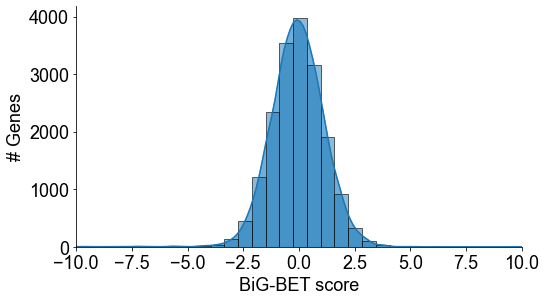

In [19]:
plt.close()
# f,a=plt.subplots(1,1,figsize=(4,2))


dpplt=sbn.displot(all_big_bets['bigbets'],kde=True,bins=45)
# dpplt=sbn.displot(ddr_filt_only['bigbets'],kind='kde',ax=a)

a=dpplt.axes[0][0]

l2=dpplt.axes[0][0].lines[0]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
a.fill_between(x2,y2, color=(75/255,156/255,211/255), alpha=0.8)

f=plt.gcf()
f.set_size_inches((8,4))
a.set_xlim([-10,10])
a.set_xlabel('BiG-BET score',fontsize=18)
a.set_ylabel('# Genes',fontsize=18)

plt.show()

In [20]:
for g in ddr_filt_only[ddr_filt_only['bigbets']<0].index:
    print(g,end=', ')
    
print()
print()

for g in ddr_filt_only[ddr_filt_only['bigbets']>0].index:
    print(g,end=', ')

APEX1, APEX2, ATM, ATR, ATRIP, BLM, BRCA1, BRCA2, BRIP1, CHEK2, ERCC1, ERCC2, EXO1, FANCB, FANCD2, FANCL, FANCM, MUS81, NHEJ1, POLB, PRKDC, RAD51, RAD52, RBBP8, TDP1, TP53BP1, TREX1, UBE2T, XPA, XRCC3, XRCC5, 

BARD1, CHEK1, CUL5, EME1, ERCC4, ERCC5, ERCC6, FANCA, FANCC, FANCI, FEN1, GEN1, LIG4, MDC1, MLH1, MLH3, MRE11, MSH2, MSH3, MSH6, NBN, PALB2, PARP1, PMS1, PMS2, POLE, POLE3, POLL, POLM, RAD50, RNMT, SEM1, SLX1A, TDG, TOP3A, TOPBP1, UNG, XPC, XRCC2, XRCC4, XRCC6, 

In [21]:
print("low DDR")
for g in ddr_filt_only[ddr_filt_only['bigbets']<0].index:
    print(g,end=', ')
    
print()
print()
print("High DDR")

for g in ddr_filt_only[ddr_filt_only['bigbets']>0].index:
    print(g,end=', ')

low DDR
APEX1, APEX2, ATM, ATR, ATRIP, BLM, BRCA1, BRCA2, BRIP1, CHEK2, ERCC1, ERCC2, EXO1, FANCB, FANCD2, FANCL, FANCM, MUS81, NHEJ1, POLB, PRKDC, RAD51, RAD52, RBBP8, TDP1, TP53BP1, TREX1, UBE2T, XPA, XRCC3, XRCC5, 

High DDR
BARD1, CHEK1, CUL5, EME1, ERCC4, ERCC5, ERCC6, FANCA, FANCC, FANCI, FEN1, GEN1, LIG4, MDC1, MLH1, MLH3, MRE11, MSH2, MSH3, MSH6, NBN, PALB2, PARP1, PMS1, PMS2, POLE, POLE3, POLL, POLM, RAD50, RNMT, SEM1, SLX1A, TDG, TOP3A, TOPBP1, UNG, XPC, XRCC2, XRCC4, XRCC6, 

In [22]:
np.sum(ddr_filt_only['bigbets']<0)

31

# GO Term Analysis of low big-bet genes

In [111]:

cut=.05
high_zscore_genes=all_big_bets.iloc[np.where(np.logical_and(all_big_bets['bigbets']>0,
         all_big_bets['padj_bigbets']<cut))[0],:].index.values
print(len(high_zscore_genes))

high_zscore_genes=all_big_bets.sort_values(ascending=False,by='bigbets').iloc[:50,:].index.values
low_zscore_genes=all_big_bets.sort_values(by='bigbets',ascending=True).index[:50]

# high_zscore_genes=all_big_bets.iloc[np.where(all_big_bets['padj_tcga']<cut)[0],:].index.values
print(len(high_zscore_genes))
print(len(low_zscore_genes))

48
50
50


In [93]:
len(low_zscore_genes)

200

In [96]:
ddr_genes=np.array(list(bigbets.ddr_data_object.myddr_obj.gene_2_path_dict.keys()))
ddr_genes[np.isin(ddr_genes,low_zscore_genes)]

array(['ATM', 'BRCA1'], dtype='<U7')

In [ ]:
low_zscore_genes

In [24]:
os.path.isfile("go-basic.obo")

True

In [25]:
#from goatools github site https://github.com/tanghaibao/goatools/blob/master/notebooks/goea_nbt3102.ipynb
from goatools.base import download_go_basic_obo
from goatools.base import download_ncbi_associations
from goatools.obo_parser import GODag
from goatools.associations import read_ncbi_gene2go
from goatools.test_data.genes_NCBI_9606_ProteinCoding import GENEID2NT as GeneID2nt_human
from goatools.go_enrichment import GOEnrichmentStudy
import mygene


data_dir=os.path.join(bigbets.file_locations.tcga_dir,'tcga_all_genes_GOterm_results')
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

my=mygene.MyGeneInfo()
goterm_results_dir=os.path.join(data_dir,"./GOTERM_resutls")
if not os.path.exists(goterm_results_dir):
    os.makedirs(goterm_results_dir)
    

obo_fname = download_go_basic_obo()

gene2go = download_ncbi_associations()


obodag = GODag("go-basic.obo")

geneid2gos_human = read_ncbi_gene2go("gene2go", taxids=[9606],namespace='BP')

convdict={'FAM46C':'TENT5C','WISP3':'CCN6'}
revdict = dict ([ (val,k) for k,val in convdict.items()])

geneids=list(map(lambda x: convdict.get(x,x),all_big_bets.index.values))
mg = mygene.MyGeneInfo()

read=True
genetable_out=os.path.join(data_dir,'gene_id_table.csv')
if read and os.path.exists(genetable_out):
    genetble=pd.read_csv(genetable_out,index_col=0)
else:
    genetble = mg.querymany(list(geneids),
                            fields=['entrezgene'],
                            scopes=['symbol'],
                            species='human',
                            as_dataframe=True)
    
    #drop missing
    genetble = genetble.iloc[np.where(genetble['notfound']!=True)[0],:]
    genetble=genetble.iloc[np.where(np.logical_not(pd.isnull(genetble['entrezgene'])))[0],:]
    genetble.to_csv(genetable_out)

#create a few useufl dictionaries here 
symbol2entrez=dict([ (revdict.get(k,k), int(val) ) for k,val in dict(zip(genetble.index,genetble['entrezgene'])).items()])
enterz2symol =  dict([( val,k) for k,val in symbol2entrez.items()])

# #filter for genes in current list
geneid2gos_human = dict( [(k,val) for k,val in  geneid2gos_human.items() if k in enterz2symol ]  ) #filter for genes in study

print("{N:,} annotated human genes".format(N=len(geneid2gos_human)))

goeaobj = GOEnrichmentStudy(
        geneid2gos_human.keys(), # List of human protein-coding genes
        geneid2gos_human, # geneid/GO associations
        obodag, # Ontologies
        propagate_counts = False,
        alpha = 0.1, # default significance cut-off
        methods = ['fdr_bh']) # defult multipletest correction method



  EXISTS: go-basic.obo
  EXISTS: gene2go
go-basic.obo: fmt(1.2) rel(2021-11-16) 47,155 GO Terms
HMS:0:00:04.968467 335,439 annotations READ: gene2go 
1 taxids stored: 9606
18569 IDs in association branch, BP
15,976 annotated human genes

Load GOEA Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
100% 15,976 of 15,976 population items found in association


In [26]:

sig_entrez=[ symbol2entrez[x] for x in high_zscore_genes if x in symbol2entrez.keys()]
goea_results_all = goeaobj.run_study(sig_entrez)
# goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.1]
goea_results_sig = [r for r in goea_results_all if r.study_count > 0]

gofile=os.path.join(data_dir,"permutation_test_sig_goterms.txt")
goeaobj.wr_tsv(gofile, goea_results_sig)
gores=pd.read_table(gofile)

gores['item_symbols']=gores['study_items'].apply(lambda x: ",".join([ enterz2symol[int(entr)] 
                                                                     for entr in str(x).split(",")]))
ids2keep=gores.groupby('item_symbols')['depth'].idxmax()
gores=gores.loc[ids2keep,:]
gores.sort_values(by='p_uncorrected',inplace=True)


Run GOEA Gene Ontology Analysis: current study set of 50 IDs ...
100%     46 of     46 study items found in association
 92%     46 of     50 study items found in population(15976)
Calculating 12,236 uncorrected p-values using fisher_scipy_stats
  12,236 GO terms are associated with 15,976 of 15,976 population items
     388 GO terms are associated with     46 of     50 study items
  METHOD fdr_bh:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
    388 items WROTE: /Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/TCGA/BIG_BETS/data/pan_can_maf/tcga_all_genes_GOterm_results/permutation_test_sig_goterms.txt


## lowest z-score genes

In [100]:
len(low_zscore_genes)

50

In [112]:

sig_entrez=[ symbol2entrez[x] for x in low_zscore_genes if x in symbol2entrez.keys()]
goea_results_all = goeaobj.run_study(sig_entrez)
goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]
# goea_results_sig = [r for r in goea_results_all if r.study_count > 0]

gofile=os.path.join(data_dir,"permutation_test_sig_goterms_lowscore.txt")
goeaobj.wr_tsv(gofile, goea_results_sig)
gores=pd.read_table(gofile)
gores['item_symbols']=gores['study_items'].apply(lambda x: ",".join([ enterz2symol[int(entr)] 
                                                                     for entr in str(x).split(",")]))
ids2keep=gores.groupby('item_symbols')['depth'].idxmax()
gores=gores.loc[ids2keep,:]
gores.sort_values(by='p_uncorrected',inplace=True)


Run GOEA Gene Ontology Analysis: current study set of 50 IDs ...
100%     50 of     50 study items found in association
100%     50 of     50 study items found in population(15976)
Calculating 12,236 uncorrected p-values using fisher_scipy_stats
  12,236 GO terms are associated with 15,976 of 15,976 population items
   1,201 GO terms are associated with     50 of     50 study items
  METHOD fdr_bh:
      95 GO terms found significant (< 0.1=alpha) ( 95 enriched +   0 purified): statsmodels fdr_bh
      45 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
     60 items WROTE: /Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/TCGA/BIG_BETS/data/pan_can_maf/tcga_all_genes_GOterm_results/permutation_test_sig_goterms_lowscore.txt


In [28]:
#plot out goterm tree for several significant goterms
Go_id_subsets=[
    ['GO:0006355','GO:0045892','GO:0000122','GO:0045944','GO:0045893'],
    ['GO:0006338'],
    ['GO:0007050'],
    ['GO:0008285'],['GO:0043066'],['GO:2000134']
]
# Go_id_subsets=Go_id_subsets[0]
Go_id_subsets_flat=[ x for xs in Go_id_subsets for x in xs]

obodag_subset={}
for k,val in obodag.items():
    if k in Go_id_subsets_flat:
        obodag_subset[k]=val

for k,val in obodag_subset.items():
    for p in val.parents:
        if p.id not in Go_id_subsets_flat:
            p.parents={}
            
from goatools.godag_plot import plot_gos, plot_results, plot_goid2goobj

gotermplots=os.path.join(graphics_dir,'goterm_plots')
if not os.path.exists(gotermplots):
    os.makedirs(gotermplots)
    
for i,idset in enumerate(Go_id_subsets):
    outfile=os.path.join(gotermplots,'low_zscore_{:d}.png'.format(i))
    plot_gos(outfile, idset,
                obodag_subset,
                id2symbol=enterz2symol, # Print study gene Symbols, not Entrez GeneIDs
                study_items=6, # Only only 6 gene Symbols max on GO terms
                items_p_line=3, # Print 3 genes per line
                goea_results=goea_results_sig)

    

    5 usr  12 GOs  WROTE: /Users/whweir/Dropbox/2020_Weir_TMB/CellRepMed Submission/R1_CellRepMed/updated_figures/goterm_plots/low_zscore_0.png
    1 usr   2 GOs  WROTE: /Users/whweir/Dropbox/2020_Weir_TMB/CellRepMed Submission/R1_CellRepMed/updated_figures/goterm_plots/low_zscore_1.png
    1 usr   3 GOs  WROTE: /Users/whweir/Dropbox/2020_Weir_TMB/CellRepMed Submission/R1_CellRepMed/updated_figures/goterm_plots/low_zscore_2.png
    1 usr   3 GOs  WROTE: /Users/whweir/Dropbox/2020_Weir_TMB/CellRepMed Submission/R1_CellRepMed/updated_figures/goterm_plots/low_zscore_3.png
    1 usr   3 GOs  WROTE: /Users/whweir/Dropbox/2020_Weir_TMB/CellRepMed Submission/R1_CellRepMed/updated_figures/goterm_plots/low_zscore_4.png
    1 usr   4 GOs  WROTE: /Users/whweir/Dropbox/2020_Weir_TMB/CellRepMed Submission/R1_CellRepMed/updated_figures/goterm_plots/low_zscore_5.png


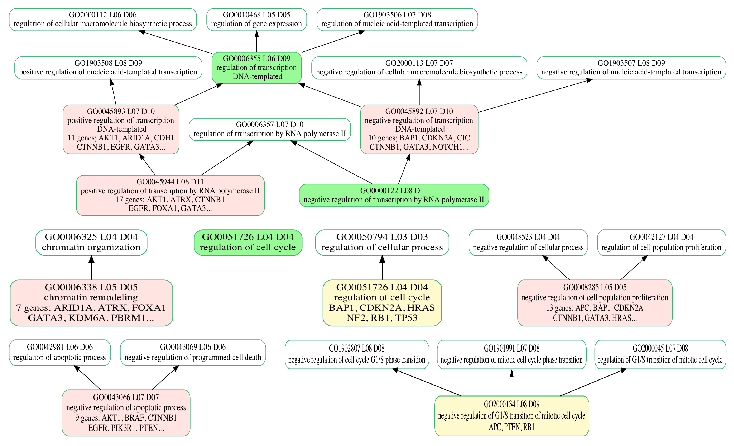

In [29]:
gotermout=os.path.join(graphics_dir,'goterms_combined_lowzscore.png')
plt.close()
f=plt.gcf()
f.set_size_inches(10,6)

#ROW 1
a=plt.subplot2grid((8,8),(0,0),rowspan=4,colspan=8)
a.set_axis_off()
outfile=os.path.join(gotermplots,'low_zscore_{:d}.png'.format(0))
img=mpimg.imread(outfile)
plt.imshow(img,aspect='auto',interpolation='none')

#ROW 2
a=plt.subplot2grid((8,8),(4,0),rowspan=2,colspan=2)
a.set_axis_off()
outfile=os.path.join(gotermplots,'low_zscore_{:d}.png'.format(1))
img=mpimg.imread(outfile)
plt.imshow(img,aspect='auto',interpolation='none')

a=plt.subplot2grid((8,8),(4,2),rowspan=2,colspan=3)
a.set_axis_off()
outfile=os.path.join(gotermplots,'low_zscore_{:d}.png'.format(2))
img=mpimg.imread(outfile)
plt.imshow(img,aspect='auto',interpolation='none')

a=plt.subplot2grid((8,8),(4,5),rowspan=2,colspan=3)
a.set_axis_off()
outfile=os.path.join(gotermplots,'low_zscore_{:d}.png'.format(3))
img=mpimg.imread(outfile)
plt.imshow(img,aspect='auto',interpolation='none')

#ROW 3
a=plt.subplot2grid((8,8),(6,0),rowspan=2,colspan=3)
a.set_axis_off()
outfile=os.path.join(gotermplots,'low_zscore_{:d}.png'.format(4))
img=mpimg.imread(outfile)
plt.imshow(img,aspect='auto',interpolation='none')

a=plt.subplot2grid((8,8),(6,3),rowspan=2,colspan=5)
a.set_axis_off()
outfile=os.path.join(gotermplots,'low_zscore_{:d}.png'.format(5))
img=mpimg.imread(outfile)
plt.imshow(img,aspect='auto',interpolation='none')

f.subplots_adjust(top=1.0,bottom=0,right=1.0,left=0.0)
f.savefig(gotermout,dpi=200)
plt.show()

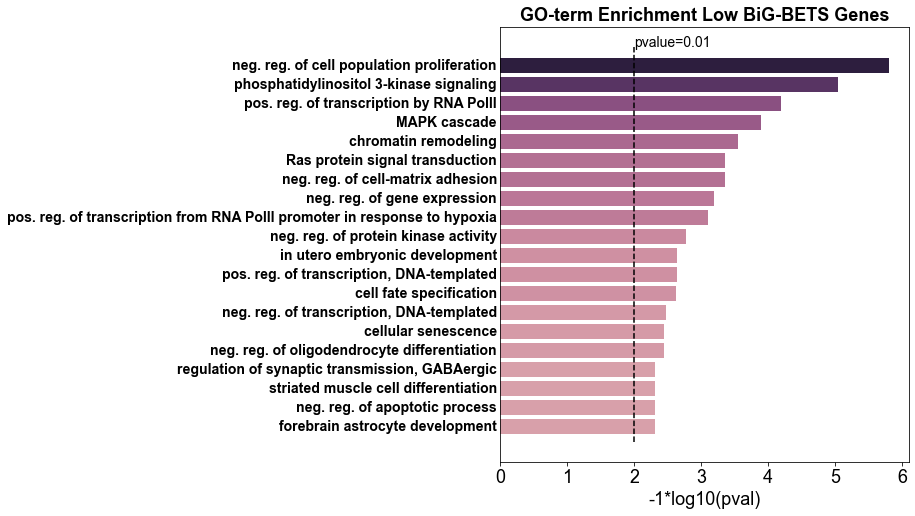

In [30]:
n2plot=20
outfile=os.path.join(graphics_dir,"R1_Figure_2D_go_terms_low_zscore_genes.pdf")
widths=-1*np.log10(gores['p_fdr_bh'])[:n2plot]
names=gores['name'][:n2plot]
glist=gores['item_symbols'][:n2plot]

cmap=sbn.cubehelix_palette(as_cmap=True)
cnorm=mc.Normalize(vmin=-1*np.log10(gores['p_fdr_bh'].max()),
                  vmax=-1*np.log10(gores['p_fdr_bh'].min()))

colors=list(map(lambda x: cmap(cnorm(-1*np.log10(x))),gores['p_fdr_bh'])) 


f,a=plt.subplots(1,1,figsize=(14,7))

a.barh(y=np.flip(range(n2plot)),color=colors,
       width=widths,height=.8)

# a.vlines(x=-1*np.log10(.05),ymin=-.8,ymax=n2plot,linestyle='--')
pval=.01
a.vlines(x=-1*np.log10(pval),ymin=-.8,ymax=n2plot,linestyle='--',color='k')
a.text(s='pvalue={:.2f}'.format(pval),x=-1*np.log10(pval),y=n2plot,fontsize=14)
# a.vlines(x=-1*np.log10(.001),ymin=-.8,ymax=n2plot,linestyle='--')

new_names=list(map(lambda x: re.sub("negative regulation","neg. reg.",x),names))
new_names=list(map(lambda x: re.sub("positive regulation","pos. reg.",x),new_names))
new_names=list(map(lambda x: re.sub("RNA polymerase II","RNA PolII",x),new_names))

for i,lab in enumerate(new_names):
    a.text(s=lab,x=-0.05,y=len(names)-1.2-i,fontsize=14,horizontalalignment='right',fontweight='bold')
    
a.set_title("GO-term Enrichment Low BiG-BETS Genes",fontsize=18,fontweight='bold')
a.get_yaxis().set_visible(False)
a.set_xlabel("-1*log10(pval)",fontsize=18)

# for i,name in enumerate(names):
#     a.text(s=name,x=0,horizontalalignment='right',y=1.0-i/n2plot,transform=a.transAxes)

f.subplots_adjust(top=.955,right=.99,bottom=.092,left=.585)
f.savefig(outfile,dpi=200)

plt.show()

# Supplemental Figures

## Histogram of TMB values by DDR pathways

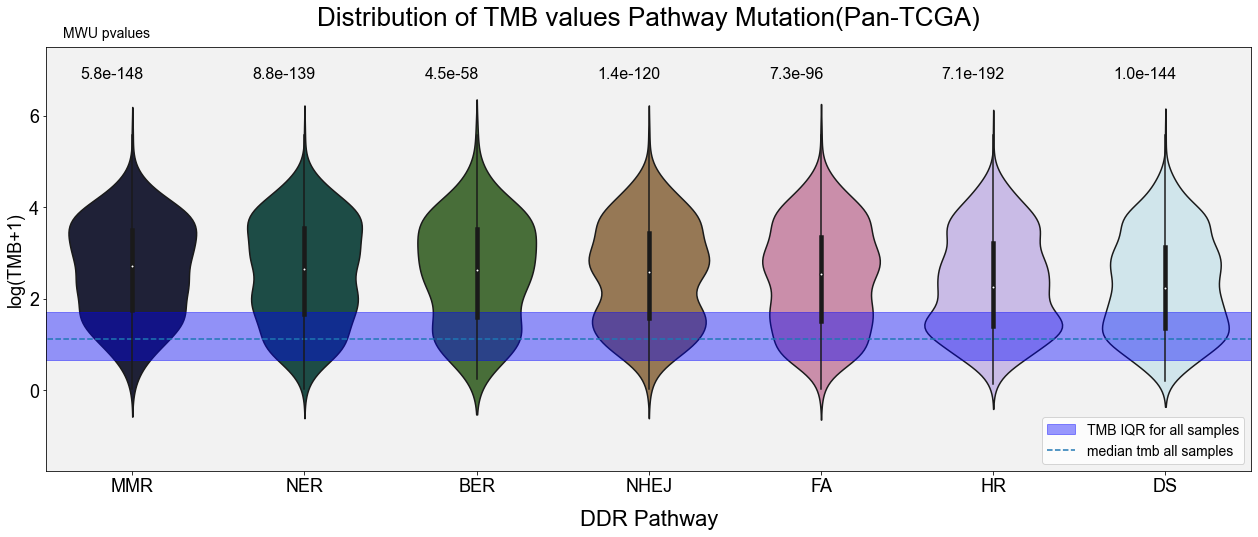

In [31]:
outfile=os.path.join(supplements_dir,'R1_Figure_S1A_violin_fig_tcga.pdf')


path_tmb_vals=pd.DataFrame(columns=['sample','tmb','path'])
# all_ind=alteration_data['Specimen ID'].unique() 

all_ind=tcga_data.tcga_spec_by_all_genes_wmod.index
array2use=tcga_data.tcga_spec_by_all_genes_wmod
snv_df=tcga_data.tcga_snv_indel_df

pathways2use=['BER', 'NER', 'MMR', 'FA', 'HR', 'NHEJ', 'DS']

for path in pathways2use:
    genes=ddr_obj.path_2_genes_dict[path]
    ctmbs=bigbets.bipartite_helper_functions.get_tmb_values_genes(genes,array2use,snv_indel_df=snv_df)
    ctmbs=ctmbs.to_frame(name='tmb')
    ctmbs['sample']=ctmbs.index
    ctmbs['path']=path
    ctmbs.index=np.arange(ctmbs.shape[0])
    path_tmb_vals=pd.concat([path_tmb_vals,ctmbs])
    
path_tmb_vals['log1ptmb']=path_tmb_vals['tmb'].apply(np.log1p)


plt.close()
f,a=plt.subplots(1,1,figsize=(18,7.5))
var2use='log1ptmb'
order=path_tmb_vals.groupby('path')[var2use].median().sort_values(ascending=False).index
pal=sbn.color_palette('cubehelix',n_colors=len(order))

bp=sbn.violinplot(y=var2use,x='path',order=order,inner='box',
               data=path_tmb_vals,palette=pal,ax=a,scale='area')


n=len(all_ind)
low_n=int(np.round(n/2.0-1.96*np.sqrt(n)/2.0))
up_n=int(np.round(n/2.0+1.96*np.sqrt(n)/2.0))

all_tmb_log1p=np.log1p(snv_df.loc[all_ind,'tmb'])

up_qrt,low_qrt=np.percentile(all_tmb_log1p,[75,25])
median_snv=np.median(all_tmb_log1p)

xmin=-1
xmax=7.5
# a.fill_between(x=[xmin,xmax],y1=[CI_up,CI_up],y2=[CI_low,CI_low],alpha=.4,color='red')
a.fill_between(x=[xmin,xmax],y1=[up_qrt,up_qrt],y2=[low_qrt,low_qrt],alpha=.4,color='blue',label='TMB IQR for all samples')
a.hlines(y=median_snv,xmin=xmin,xmax=xmax,linestyle='--',label='median tmb all samples')
a.text(s="DDR Pathway",fontsize=22,x=.5,y=-.13,horizontalalignment='center',transform=a.transAxes)
a.set_xlabel("")
a.set_ylabel("log(TMB+1)",fontsize=18)
for i,path in enumerate(order):
    a.text(s="{:.1e}".format(ddr_path_bigbets.loc[path,'MWU_pval']),x=i-.3,y=6.8,rotation=0,fontsize=16)

    
plt.setp(a.get_xticklabels(), fontsize=18) 
a.set_facecolor((.95,.95,.95,1))
a.text(s='MWU pvalues',y=7.7,x=-.4,fontsize=14)
a.set_ylim([-1.75,7.5])
a.set_xlim([-.5,6.5])
# a.text(s='MWU pvalues',y=6,x=6.5)
a.legend(loc=4,fontsize=14)
a.set_title("Distribution of TMB values Pathway Mutation(Pan-TCGA)",fontsize=26,
            x=.5,y=1.05,transform=a.transAxes)
f.subplots_adjust(top=.915,bottom=.13,right=.98,left=.05)
f.savefig(outfile)
plt.show()


2021-12-30 15:07:44,056:matplotlib.axes._axes:WARNING:*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2021-12-30 15:07:44,058:matplotlib.axes._axes:WARNING:*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2021-12-30 15:07:44,062:matplotlib.axes._axes:WARNING:*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-ar

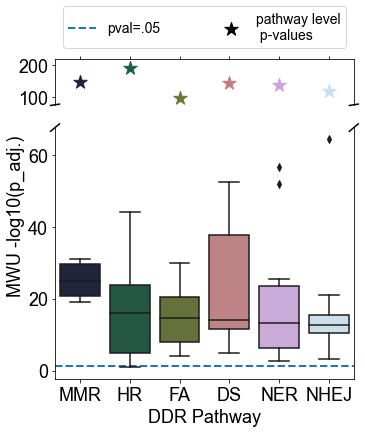

In [32]:

outfile=os.path.join(supplements_dir,"DDR_MWU_dist_comp.pdf")
plt.close()


ddr_filt_only=all_big_bets[np.logical_not(all_big_bets['path'].isin(['None',np.nan]))]
ddr_filt_only_nober=ddr_filt_only[ddr_filt_only['path']!='BER']

order=ddr_filt_only_nober.groupby('path')['-log10_padj'].median().sort_values(ascending=False).index

colors=sbn.color_palette('cubehelix',n_colors=len(order))

f=plt.gcf()
f.set_size_inches(5,6)
gs=gridspec.GridSpec(nrows=10,ncols=1)

a=plt.subplot(gs[2:,0])
sbn.boxplot(data=ddr_filt_only_nober,x='path',y='-log10_padj',order=order,ax=a,palette=colors)
a.set_ylabel('')
a.text(s="MWU -log10(p_adj.)",x=-.16,y=.65,transform=a.transAxes,
       fontsize=18,rotation=90,verticalalignment='center')
a.set_xlabel("DDR Pathway",fontsize=18)
a2=plt.subplot(gs[:2,0],sharex = a)
for i,path in enumerate(order):
    a2.scatter(i,ddr_path_bigbets.loc[path,'-1og10_MWU'],marker='*',s=200,c=colors[i])
a2.set_ylim([75,220])
# hide the spines between ax and a
a2.spines['bottom'].set_visible(False)
a.spines['top'].set_visible(False)
a2.xaxis.tick_top()
a2.tick_params(labeltop=False)  # don't put tick labels at the top
a.xaxis.tick_bottom()
a.hlines(y=-1*np.log10(.05),xmin=-.5,xmax=5.5,linestyle='--',label='pval=.05',linewidth=2)

a.scatter([],[],c='k',marker='*',label='pathway level\n p-values',s=200)
a.legend(loc=10,bbox_to_anchor=(.5,1.4),fontsize=14,ncol=2,mode=None,columnspacing=4)

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=a2.transAxes, color='k', clip_on=False)

d2=d
a2.plot((-d2, +d2), (-d2, +d2), **kwargs)        # top-left diagonal
a2.plot((1 - d2, 1 + d2), (-d2, +d2), **kwargs)  # top-right diagonal

kwargs.update(transform=a.transAxes)  # switch to the bottom axes
a.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
a.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diago


f.subplots_adjust(hspace=2,top=.87,right=.97,left=.14,bottom=.13)
f.savefig(outfile)
plt.show()

## Histogram of pvalues All + DDR Genes

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


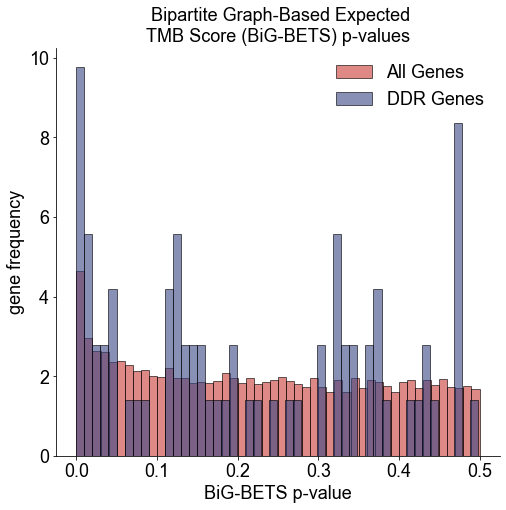

In [33]:
outfile=os.path.join(supplements_dir,'R1_Figure_S2A_pval_dist_zscore_tcga.pdf')

paths=all_big_bets['path'].unique()
paths=paths[paths!='None']
cols=sbn.color_palette('Set1',n_colors=len(paths))
path2coldict=dict(zip(paths,cols))
path2coldict['None']=(.3,.3,.3,.5)

all_big_bets['ddr_col']=all_big_bets['path'].apply(lambda x :path2coldict.get(x,(.3,.3,.3,.5)) )
ddr_filt_only=all_big_bets.iloc[np.where(np.logical_not(all_big_bets['path'].isin(['None'])))[0],:]


plt.close()
f,a=plt.subplots(1,1,figsize=(7,7))

# 
# a.text(s='B)',fontsize=18,fontweight='bold',x=-.06,y=1.0,transform=a.transAxes)

a.hist(all_big_bets['pval_bigbets'],bins=50,alpha=.6,color=red,edgecolor='k',density=True,label='All Genes')
a.hist(ddr_filt_only['pval_bigbets'],bins=50,alpha=.6,color=blue,edgecolor='k',density=True,label='DDR Genes')
a.legend(fontsize=18,frameon=False)
a.set_ylabel("gene frequency",fontsize=18)
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)

a.set_xlabel("BiG-BETS p-value",fontsize=18)
a.set_title(" Bipartite Graph-Based Expected\nTMB Score (BiG-BETS) p-values",fontsize=18)
# a.set_ylim([0,750])
f.subplots_adjust(top=.91,right=.99,left=.11,bottom=.1)
f.savefig(outfile)
plt.show()

## Individual Gene CDFs

In [34]:
genes2keep=['ATR',"CHEK1"]

# smaller_runs_dir=os.path.join(bigbets.file_locations.bipartite_samples_dir,"sampled_data/tcga_all_genes_high/smaller_runs_300")
smaller_runs_dir=os.path.join(bigbets.file_locations.bipartite_samples_dir,"sampled_data/tcga_all_genes_moderate_high/smaller_runs_300")

data_files=[ os.path.join(smaller_runs_dir,f) for f in os.listdir(smaller_runs_dir) if re.search("genes.pickle",f)]

#we keep track of the mean tmb for each gene and each sample across all runs
combined_gene_cdfs_tmbs={}
data_files
genes2use=tcga_data.tcga_spec_by_all_genes_wmod.columns
for i,file in enumerate(data_files):
    print(i)
    with gzip.open(file,'rb') as fh:
        cdata=pickle.load(fh)
    for ii,gene in enumerate(genes2keep):
        all_x,all_ecdf=cdata.loc[gene]
        all_x=np.array(all_x)
        if i==0:
            combined_gene_cdfs_tmbs[gene]=(np.array(all_x),np.array(all_ecdf))
        else:
            cur_comb_all_x,cur_comb_ecdf=combined_gene_cdfs_tmbs[gene]
            combined_gene_cdfs_tmbs[gene]=(np.concatenate([cur_comb_all_x,all_x],axis=0),
                                      np.concatenate([cur_comb_ecdf,np.array(all_ecdf)]))
    
    del cdata
    print()

0

1



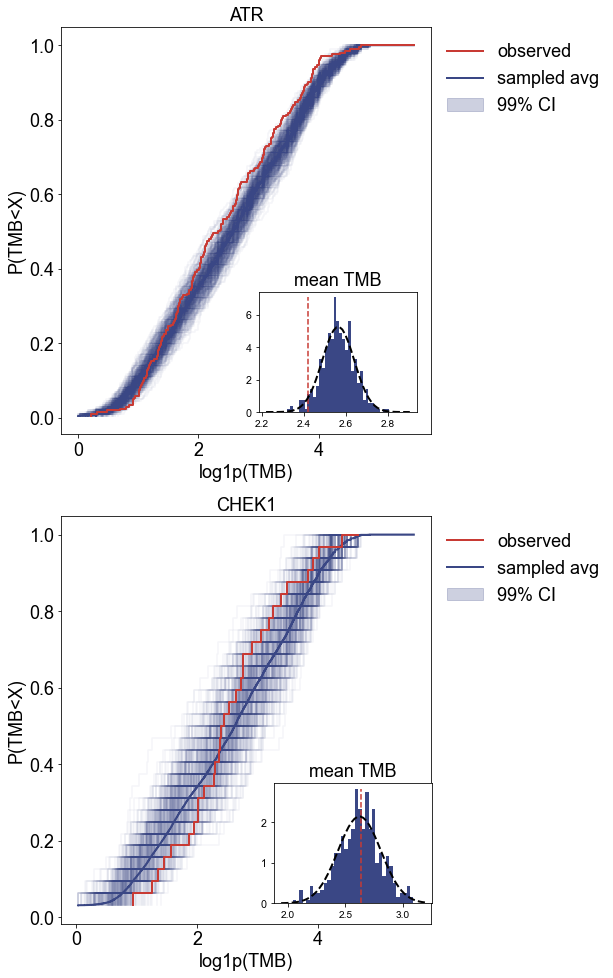

In [35]:

outfile=os.path.join(supplements_dir,"R1_Figure_S2B_tcga_atr_check1_rewire.pdf")

array=tcga_data.tcga_spec_by_all_genes_wmod


f,a=plt.subplots(2,1,figsize=(9,14))

hscale=.7
yscale=.87

gene='ATR'
a=plt.subplot(2,1,1)
all_x,all_ecdf=combined_gene_cdfs_tmbs[gene]
x_cat, mean_ecdf, ecdf_lower, ecdf_upper = bigbets.bipartite_helper_functions.get_ecdf_upper_lower(all_x, all_ecdf)
x1,ecdf1=bigbets.bipartite_helper_functions.get_ecdf_tmb_df(genes=[gene],df=array,
                      snv_indel_df=tcga_data.tcga_snv_indel_df)

a.step(x1, ecdf1, color=red, label='observed', zorder=3, linewidth=2)
# a.hlines(y=.5, xmin=0, xmax=2, linestyle='--')
#     a.plot(x,ecdf,color='g',label='all')
a.step(x_cat, mean_ecdf, color=blue, label='sampled avg', linewidth=2)
# a.set_title("{:}({:d} genes / {:d} samples)".format(path, len(path_ind), nsamps), fontsize=18,
#             fontweight='bold')
a2=bigbets.bipartite_helper_functions.add_subplot_axes(ax=a,rect=[.4,.09,.45*hscale,.4*yscale])
a2.set_title("mean TMB",fontsize=18)
med_tmbs=[]
for i, x_s in enumerate(all_x):
    a.step(x_s, all_ecdf[i], color=blue, alpha=.05)
    med_tmbs.append(np.mean(x_s))
    
    
# a.fill_between(x_cat, ecdf_lower,ecdf_upper,color='b',alpha=.05,label='99% CI')

y, x, _ =a2.hist(med_tmbs,bins=35,density=True,color=blue)
a2.vlines(x=np.mean(x1),ymin=0,ymax=y.max(),color=red,linestyle='--')
xs=np.linspace(x.min()-.1,x.max()+.1)
p = stats.norm.pdf(xs, np.mean(med_tmbs), np.std(med_tmbs))
a2.plot(xs,p,color='k',linestyle='--',linewidth=2)

a.set_title(r"{}".format(gene), fontsize=18)
a.set_xlabel(r"log1p(TMB)", fontsize=18)
a.set_ylabel(r'P(TMB<X)',fontsize=18)
#     a.set_xlim([0,.1])

# add in CI label to legend
handles, labels = a.get_legend_handles_labels()
patch = patches.Patch(color=blue, label=r'99% CI',alpha=.25)
handles.append(patch) 
a.legend(handles=handles, loc='upper center',fontsize=18,bbox_to_anchor=[1.25,1.0],frameon=False)

gene='CHEK1'
a=plt.subplot(2,1,2)
all_x,all_ecdf=combined_gene_cdfs_tmbs[gene]
x_cat, mean_ecdf, ecdf_lower, ecdf_upper = bigbets.bipartite_helper_functions.get_ecdf_upper_lower(all_x, all_ecdf)
x1,ecdf1=bigbets.bipartite_helper_functions.get_ecdf_tmb_df(genes=[gene],df=array,
                      snv_indel_df=tcga_data.tcga_snv_indel_df)

a.step(x1, ecdf1, color=red, label='observed', zorder=3, linewidth=2)
# a.hlines(y=.5, xmin=0, xmax=2, linestyle='--')
#     a.plot(x,ecdf,color='g',label='all')
a.step(x_cat, mean_ecdf, color=blue, label='sampled avg', linewidth=2)
# a.set_title("{:}({:d} genes / {:d} samples)".format(path, len(path_ind), nsamps), fontsize=18,
#             fontweight='bold')
a2=bigbets.bipartite_helper_functions.add_subplot_axes(ax=a,rect=[.43,-.13,.45*hscale,.4*yscale])
a2.set_title("mean TMB",fontsize=18)
med_tmbs=[]
for i, x_s in enumerate(all_x):
    a.step(x_s, all_ecdf[i], color=blue, alpha=.05)
    med_tmbs.append(np.mean(x_s))
    
    
# a.fill_between(x_cat, ecdf_lower,ecdf_upper,color='b',alpha=.05,label='99% CI')

y, x, _ =a2.hist(med_tmbs,bins=35,density=True,color=blue)
a2.vlines(x=np.mean(x1),ymin=0,ymax=y.max(),color=red,linestyle='--')
xs=np.linspace(x.min()-.1,x.max()+.1)
p = stats.norm.pdf(xs, np.mean(med_tmbs), np.std(med_tmbs))
a2.plot(xs,p,color='k',linestyle='--',linewidth=2)

a.set_title("{}".format(gene), fontsize=18)
a.set_xlabel("log1p(TMB)", fontsize=18)
a.set_ylabel('P(TMB<X)',fontsize=18)
#     a.set_xlim([0,.1])

# add in CI label to legend
handles, labels = a.get_legend_handles_labels()
patch = patches.Patch(color=blue, label='99% CI',alpha=.25)
handles.append(patch) 
a.legend(handles=handles, loc='upper center',fontsize=18,bbox_to_anchor=[1.25,1.0],frameon=False)


f.subplots_adjust(top=.95,right=.7,left=.13,bottom=.06)
f.savefig(outfile,dpi=200)
plt.show()

## TCGA vs Samstein BiG-BET scores

querying 1-468...done.
Finished.
1 input query terms found no hit:
	['RP11-211G3.3']
querying 1-1...done.
Finished.
1 input query terms found no hit:
	['RP11-211G3.3']


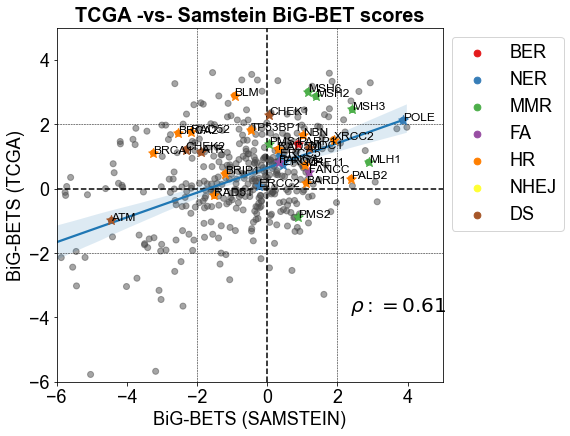

In [36]:
samstein_bigbet_scores=pd.read_csv(bigbets.file_locations.bigbet_scores_samstein_file,index_col=0)
ddr_filt_only=all_big_bets.iloc[np.where(np.logical_not(all_big_bets['path'].isin(['None'])))[0],:]

#match names if needed
orig_names=samstein_bigbet_scores.index
new_names=bigbets.name_matching_scripts.match_names_to_symbols(samstein_bigbet_scores.index)
samstein_bigbet_scores.index=new_names
samstein_bigbet_scores.index.isin(all_big_bets.index)

samstein_bigbet_scores['bigbets_samstein']=samstein_bigbet_scores['bigbets']
samstein_bigbet_scores['bigbets_tcga']=all_big_bets.loc[samstein_bigbet_scores.index.intersection(all_big_bets.index),'bigbets']
samstein_bigbet_scores['path']=list(map(lambda x: ddr_obj.gene_2_path_dict.get(x,['None'])[0],samstein_bigbet_scores.index))
samstein_bigbet_scores=samstein_bigbet_scores.loc[~samstein_bigbet_scores['bigbets_tcga'].isna(),:]

# outfile=os.path.join(graphics_dir,"samstein_vs_tcga_allgenelevel_permutation_test.png")
outfile=os.path.join(supplements_dir,'R1_Figure_S2C_samstein_vs_tcga_allgenelevel_permutation_test.pdf')
paths=['BER', 'NER', 'MMR', 'FA', 'HR', 'NHEJ', 'DS']

cols=sbn.color_palette('Set1',n_colors=len(paths))
path2coldict=dict(zip(paths,cols))
path2coldict['None']=(.3,.3,.3,.5)
samstein_bigbet_scores['ddr_col']=samstein_bigbet_scores['path'].apply(lambda x :path2coldict.get(x,(.3,.3,.3,.5)) )



plt.close()
f,a=plt.subplots(1,1,figsize=(8,6))



a=plt.subplot(1,1,1) 
x=samstein_bigbet_scores['bigbets_tcga'].values
y=samstein_bigbet_scores['bigbets_samstein'].values
slope,inter,_,_,_=stats.linregress(x,y)
r2,pval=stats.pearsonr(x,y)

sizes=samstein_bigbet_scores['gene_mut_cnt']/2
a.scatter(x,y,c=samstein_bigbet_scores['ddr_col'].values)
sbn.regplot(x='bigbets_tcga',y='bigbets_samstein',data=samstein_bigbet_scores,ax=a,scatter=False)


#add annotations 
# ts=[]
# for gene in samstein_bigbet_scores.index:
#     x=samstein_bigbet_scores.loc[gene,'bigbets_samstein']
#     y=samstein_bigbet_scores.loc[gene,'zscore_tcga_samstein_filt']
#     if  x>0 or y>0:
#         sign= -1 if y>x*slope+inter else 1
        
#         dist=np.random.uniform(low=10,high=40)
        
#         ts.append(a.annotate(gene, xy=(x, y), xytext=(sign*dist,-sign*dist), 
#                 textcoords='offset points', ha='center', va='bottom',fontsize=18,
#                 bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.3),
#                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.0', 
#                                 color='red')))
        
# adjust_text(ts)

for gene in samstein_bigbet_scores.index:
    if gene in ddr_filt_only.index:
        x=samstein_bigbet_scores.loc[gene,'bigbets_tcga']
        y=samstein_bigbet_scores.loc[gene,'bigbets_samstein']
        a.scatter(x,y,color=samstein_bigbet_scores.loc[gene,'ddr_col'],s=100,marker="*",zorder=3)
        a.text(s=gene,x=x,y=y,fontsize=12)

leg1=[]
for path in paths:
    if path in ddr_path_bigbets.index:
#         a.scatter(ddr_path_zscore.loc[path,'bigbets_samstein'],ddr_path_zscore.loc[path,'zscore_tcga_samstein_filt'],
#                   marker='o',facecolor='none',edgecolor=path2coldict[path],linewidth=3,s=1000)
        leg1+=[a.scatter([],[],s=45,color=path2coldict[path])]
Leg1=Legend(a, leg1, paths, bbox_to_anchor=(1, 1),loc=2,fontsize=18)

a.text(x=.76,y=.2,s=r"$\rho:={:.2f}$".format(r2),
       transform=a.transAxes,fontsize=20,fontweight="bold")

a.set_title("TCGA -vs- Samstein BiG-BET scores",fontsize=20,fontweight='bold')
a.set_xlabel("BiG-BETS (SAMSTEIN)",fontsize=18)
a.set_ylabel("BiG-BETS (TCGA)",fontsize=18)

a.add_artist(Leg1)

a.set_ylim([-6,5])
ymin,ymax=a.get_ylim()
a.vlines(x=0,ymin=ymin,ymax=ymax,linestyle='--',color='k')
a.vlines(x=2,ymin=ymin,ymax=ymax,linestyle='--',linewidth=.5,color='k')
a.vlines(x=-2,ymin=ymin,ymax=ymax,linestyle='--',linewidth=.5,color='k')

a.set_xlim([-6,5])
xmin,xmax=a.get_xlim()
a.hlines(y=0,xmin=xmin,xmax=xmax,linestyle='--',color='k')
a.hlines(y=-2,xmin=xmin,xmax=xmax,linestyle='--',linewidth=.5,color='k')
a.hlines(y=2,xmin=xmin,xmax=xmax,linestyle='--',linewidth=.5,color='k')



f.subplots_adjust(top=.93,bottom=.11,right=.78,left=.11)
f.savefig(outfile,dpi=200)
plt.show()

querying 1-468...done.
Finished.
1 input query terms found no hit:
	['RP11-211G3.3']
querying 1-1...done.
Finished.
1 input query terms found no hit:
	['RP11-211G3.3']


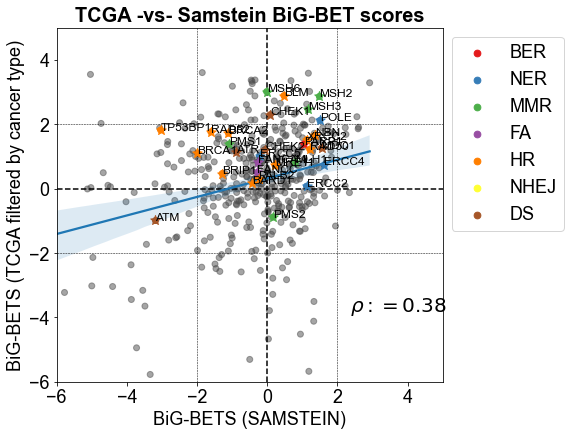

In [37]:

samstein_bigbet_scores=pd.read_csv(bigbets.file_locations.bigbet_scores_samstein_file,index_col=0)
# tcga_samstein_filt=pd.read_csv(bigbets.file_locations.bigbet_scores_tcga_filt_samstein_file,index_col=0)
tcga_samstein_filt=pd.read_csv("/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/TCGA/BIG_BETS/data/bipartite_sampling_data/tcga_filter_samstein_cancertypes_rewiring_zscores.csv",index_col=0)
#match names if needed
ddr_filt_only=tcga_samstein_filt.iloc[np.where(np.logical_not(tcga_samstein_filt['path'].isin(['None'])))[0],:]

orig_names=samstein_bigbet_scores.index
new_names=bigbets.name_matching_scripts.match_names_to_symbols(samstein_bigbet_scores.index)
samstein_bigbet_scores.index=new_names
samstein_bigbet_scores.index.isin(all_big_bets.index)

samstein_bigbet_scores['bigbets_samstein']=samstein_bigbet_scores['bigbets']
samstein_bigbet_scores['bigbets_tcga_filt']=tcga_samstein_filt.loc[samstein_bigbet_scores.index.intersection(tcga_samstein_filt.index),'bigbets']
samstein_bigbet_scores['path']=list(map(lambda x: ddr_obj.gene_2_path_dict.get(x,['None'])[0],samstein_bigbet_scores.index))
samstein_bigbet_scores=samstein_bigbet_scores.loc[~samstein_bigbet_scores['bigbets_tcga_filt'].isna(),:]

# outfile=os.path.join(graphics_dir,"samstein_vs_tcga_allgenelevel_permutation_test.png")
outfile=os.path.join(supplements_dir,'samstein_vs_tcga_matched_cancer_type_permutation_test.pdf')
paths=['BER', 'NER', 'MMR', 'FA', 'HR', 'NHEJ', 'DS']

cols=sbn.color_palette('Set1',n_colors=len(paths))
path2coldict=dict(zip(paths,cols))
path2coldict['None']=(.3,.3,.3,.5)
samstein_bigbet_scores['ddr_col']=samstein_bigbet_scores['path'].apply(lambda x :path2coldict.get(x,(.3,.3,.3,.5)) )



plt.close()
f,a=plt.subplots(1,1,figsize=(8,6))



a=plt.subplot(1,1,1) 
x=samstein_bigbet_scores['bigbets_tcga_filt'].values
y=samstein_bigbet_scores['bigbets_samstein'].values
slope,inter,_,_,_=stats.linregress(x,y)
r2,pval=stats.pearsonr(x,y)

sizes=samstein_bigbet_scores['gene_mut_cnt']/2
a.scatter(x,y,c=samstein_bigbet_scores['ddr_col'].values)
sbn.regplot(x='bigbets_tcga_filt',y='bigbets_samstein',data=samstein_bigbet_scores,ax=a,scatter=False)


#add annotations 
# ts=[]
# for gene in samstein_bigbet_scores.index:
#     x=samstein_bigbet_scores.loc[gene,'bigbets_samstein']
#     y=samstein_bigbet_scores.loc[gene,'zscore_tcga_samstein_filt']
#     if  x>0 or y>0:
#         sign= -1 if y>x*slope+inter else 1
        
#         dist=np.random.uniform(low=10,high=40)
        
#         ts.append(a.annotate(gene, xy=(x, y), xytext=(sign*dist,-sign*dist), 
#                 textcoords='offset points', ha='center', va='bottom',fontsize=18,
#                 bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.3),
#                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.0', 
#                                 color='red')))
        
# adjust_text(ts)

for gene in samstein_bigbet_scores.index:
    if gene in ddr_filt_only.index:
        x=samstein_bigbet_scores.loc[gene,'bigbets_tcga_filt']
        y=samstein_bigbet_scores.loc[gene,'bigbets_samstein']
        a.scatter(x,y,color=samstein_bigbet_scores.loc[gene,'ddr_col'],s=100,marker="*",zorder=3)
        a.text(s=gene,x=x,y=y,fontsize=12)

leg1=[]
for path in paths:
    if path in ddr_path_bigbets.index:
#         a.scatter(ddr_path_zscore.loc[path,'bigbets_samstein'],ddr_path_zscore.loc[path,'zscore_tcga_samstein_filt'],
#                   marker='o',facecolor='none',edgecolor=path2coldict[path],linewidth=3,s=1000)
        leg1+=[a.scatter([],[],s=45,color=path2coldict[path])]
Leg1=Legend(a, leg1, paths, bbox_to_anchor=(1, 1),loc=2,fontsize=18)

a.text(x=.76,y=.2,s=r"$\rho:={:.2f}$".format(r2),
       transform=a.transAxes,fontsize=20,fontweight="bold")

a.set_title("TCGA -vs- Samstein BiG-BET scores",fontsize=20,fontweight='bold')
a.set_xlabel("BiG-BETS (SAMSTEIN)",fontsize=18)
a.set_ylabel("BiG-BETS (TCGA filtered by cancer type)",fontsize=18)

a.add_artist(Leg1)

a.set_ylim([-6,5])
ymin,ymax=a.get_ylim()
a.vlines(x=0,ymin=ymin,ymax=ymax,linestyle='--',color='k')
a.vlines(x=2,ymin=ymin,ymax=ymax,linestyle='--',linewidth=.5,color='k')
a.vlines(x=-2,ymin=ymin,ymax=ymax,linestyle='--',linewidth=.5,color='k')

a.set_xlim([-6,5])
xmin,xmax=a.get_xlim()
a.hlines(y=0,xmin=xmin,xmax=xmax,linestyle='--',color='k')
a.hlines(y=-2,xmin=xmin,xmax=xmax,linestyle='--',linewidth=.5,color='k')
a.hlines(y=2,xmin=xmin,xmax=xmax,linestyle='--',linewidth=.5,color='k')



f.subplots_adjust(top=.93,bottom=.11,right=.78,left=.11)
f.savefig(outfile,dpi=200)
plt.show()

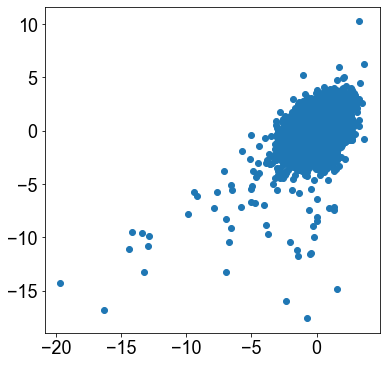

In [38]:
tcga_samstein_filt=pd.read_csv("/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/TCGA/BIG_BETS/data/bipartite_sampling_data/tcga_filter_samstein_cancertypes_rewiring_zscores.csv",index_col=0)
plt.close()
f,a=plt.subplots(1,1,figsize=(6,6))
a.scatter(tcga_samstein_filt['bigbets'],
          all_big_bets.loc[all_big_bets.index.intersection(tcga_samstein_filt.index),'bigbets'])
plt.show()

## TCGA High vs High + Mod BIG-BET Scores

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and pass

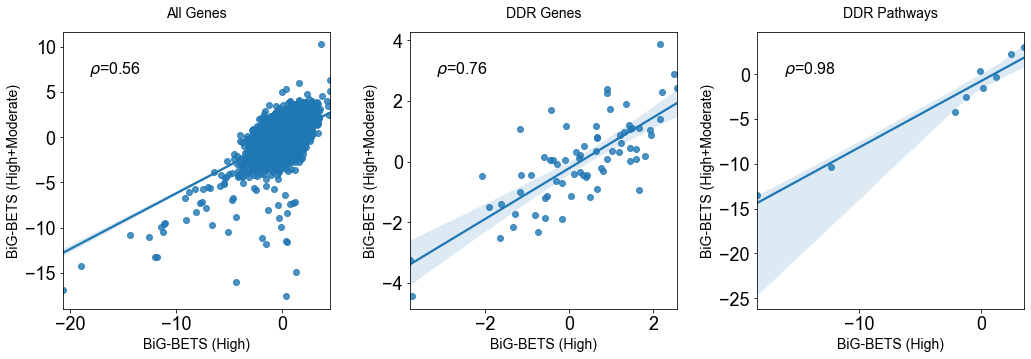

In [39]:
outfile=os.path.join(supplements_dir,'R1_Figure_S3B_tcga_high_vs_high+mod_bigbetscores.pdf')
outdir=bigbets.file_locations.bipartite_samples_dir
#load gene scores
all_gene_zscore_wmod=pd.read_csv(bigbets.file_locations.bigbet_moderate_included_scores_file,index_col=0)
all_gene_zscore=pd.read_csv(bigbets.file_locations.bigbet_scores_file,index_col=0)

all_gene_zscore_comb=all_gene_zscore_wmod.join(all_gene_zscore,how='inner',rsuffix='_highonly')
all_gene_zscore_comb['path']=list(map(lambda x: bigbets.ddr_data_object.myddr_obj.gene_2_path_dict.get(x,['None'])[0],all_gene_zscore_comb.index))
all_gene_zscore_comb_filt=all_gene_zscore_comb.loc[all_gene_zscore_comb['path']!='None',:]

all_gene_zscore_comb=all_gene_zscore_comb.dropna(how='any',axis=0)

#load pathway scores
all_path_zscore_wmod=pd.read_csv(os.path.join(outdir,'tcga_allgenes_moderate_high_path_rewiring_zscores.csv'),index_col=0)
all_path_zscore=pd.read_csv(os.path.join(outdir,'tcga_allgenes_high_path_rewiring_zscores.csv'),index_col=0)
all_path_zscore_comb=all_path_zscore_wmod.join(all_path_zscore,how='inner',rsuffix='_highonly')
all_path_zscore_comb.head()

plt.close()
f,a=plt.subplots(1,3,figsize=(15,5))

a=plt.subplot(1,3,1)

x=all_gene_zscore_comb['bigbets_highonly']
y=all_gene_zscore_comb['bigbets']
sbn.regplot(x,y)
a.set_xlabel("BiG-BETS (High)",fontsize=14)
a.set_ylabel("BiG-BETS (High+Moderate)",fontsize=14)
r,pval=stats.pearsonr(x,y)
a.text(s=r'$\rho$={:.2f}'.format(r),x=.1,y=.85,transform=a.transAxes,fontsize=16)
a.set_title("All Genes",fontsize=14,x=.5,y=1.05,transform=a.transAxes)

a=plt.subplot(1,3,2)
a.set_title("DDR Genes",fontsize=14,x=.5,y=1.05,transform=a.transAxes)
x=all_gene_zscore_comb_filt['bigbets_highonly']
y=all_gene_zscore_comb_filt['bigbets']
sbn.regplot(x,y)
a.set_xlabel("BiG-BETS (High)",fontsize=14)
a.set_ylabel("BiG-BETS (High+Moderate)",fontsize=14)
r,pval=stats.pearsonr(x,y)
a.text(s=r'$\rho$={:.2f}'.format(r),x=.1,y=.85,transform=a.transAxes,fontsize=16)


a=plt.subplot(1,3,3)
a.set_title("DDR Pathways",fontsize=14,x=.5,y=1.05,transform=a.transAxes)

x=all_path_zscore_comb['bigbets_highonly']
y=all_path_zscore_comb['bigbets']

sbn.regplot(x,y)
a.set_xlabel("BiG-BETS (High)",fontsize=14)
a.set_ylabel("BiG-BETS (High+Moderate)",fontsize=14)

r,pval=stats.pearsonr(x,y)
a.text(s=r'$\rho$={:.2f}'.format(r),x=.1,y=.85,transform=a.transAxes,fontsize=16)
f.subplots_adjust(right=.97,left=.08,bottom=.13,top=.9,wspace=.3)
f.savefig(outfile)
plt.show()

In [40]:
all_gene_zscore_comb_filt.columns

Index(['gene_mut_cnt', 'obs_tmb', 'mean', 'std', 'upper', 'lower', 'bigbets',
       'mwu_U', 'mwu_pval', 'path', 'pval_bigbets', 'padj_bigbets',
       'bigbets_sig', 'mwu_padj', 'mwu_sig', '-log10_padj',
       'gene_mut_cnt_highonly', 'obs_tmb_highonly', 'mean_highonly',
       'std_highonly', 'upper_highonly', 'lower_highonly', 'bigbets_highonly',
       'mwu_U_highonly', 'mwu_pval_highonly', 'path_highonly',
       'pval_bigbets_highonly', 'padj_bigbets_highonly',
       'bigbets_sig_highonly', 'mwu_padj_highonly', 'mwu_sig_highonly',
       '-log10_padj_highonly'],
      dtype='object')

In [113]:
col2keep=['gene_mut_cnt','bigbets','bigbets_highonly',
          'pval_bigbets','pval_bigbets_highonly','mwu_pval','mwu_U',
          'mwu_pval_highonly','path']
mapper={'mwu_U':'mwu_U_stat','path':'ddr_path','gene_mut_cnt':"num_samples_mutated"}



all_gene_zscore_comb.loc[:,col2keep].rename(mapper,axis=1).to_csv(os.path.join(dropdir,'R1_Table_S1_BiG-BETS_tcga_all.csv'))

## TCGA vs TCGA Samstein Types only

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and pass

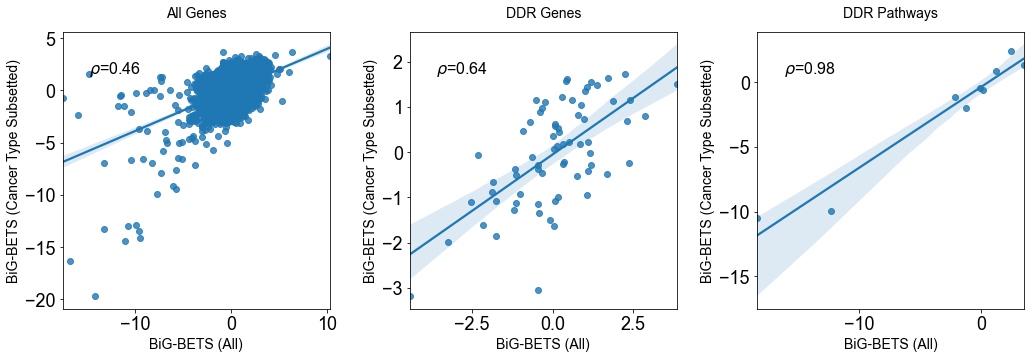

In [43]:
outfile=os.path.join(supplements_dir,'tcga_high_vs_cancertypes_filt_bigbetscores.pdf')
outdir=bigbets.file_locations.bipartite_samples_dir
#load gene scores
all_gene_zscore_filt=pd.read_csv(bigbets.file_locations.bigbet_scores_tcga_filt_samstein_file,index_col=0)
all_gene_zscore=bigbets.ClinicalDataSet.bigbet_scores_df

all_gene_zscore_comb=all_gene_zscore.join(all_gene_zscore_filt,how='inner',rsuffix='_filt')
all_gene_zscore_comb['path']=list(map(lambda x: bigbets.ddr_data_object.myddr_obj.gene_2_path_dict.get(x,['None'])[0],all_gene_zscore_comb.index))
all_gene_zscore_comb=all_gene_zscore_comb.dropna(how='any',axis=0)
all_gene_zscore_comb_filt=all_gene_zscore_comb.loc[all_gene_zscore_comb['path']!='None',:]


#load pathway scores
all_path_zscore_filt=pd.read_csv(os.path.join(outdir,'tcga_cancer_type_filt_path_rewiring_zscores.csv'),index_col=0)
all_path_zscore=pd.read_csv(os.path.join(outdir,'tcga_allgenes_high_path_rewiring_zscores.csv'),index_col=0)
all_path_zscore_comb=all_path_zscore.join(all_path_zscore_filt,how='inner',rsuffix='_filt')
all_path_zscore_comb.head()

plt.close()
f,a=plt.subplots(1,3,figsize=(15,5))

a=plt.subplot(1,3,1)

x=all_gene_zscore_comb['bigbets']
y=all_gene_zscore_comb['bigbets_filt']
sbn.regplot(x,y)
a.set_xlabel("BiG-BETS (All)",fontsize=14)
a.set_ylabel("BiG-BETS (Cancer Type Subsetted)",fontsize=14)
r,pval=stats.pearsonr(x,y)
a.text(s=r'$\rho$={:.2f}'.format(r),x=.1,y=.85,transform=a.transAxes,fontsize=16)
a.set_title("All Genes",fontsize=14,x=.5,y=1.05,transform=a.transAxes)

a=plt.subplot(1,3,2)
a.set_title("DDR Genes",fontsize=14,x=.5,y=1.05,transform=a.transAxes)
x=all_gene_zscore_comb_filt['bigbets']
y=all_gene_zscore_comb_filt['bigbets_filt']
sbn.regplot(x,y)
a.set_xlabel("BiG-BETS (All)",fontsize=14)
a.set_ylabel("BiG-BETS (Cancer Type Subsetted)",fontsize=14)
r,pval=stats.pearsonr(x,y)
a.text(s=r'$\rho$={:.2f}'.format(r),x=.1,y=.85,transform=a.transAxes,fontsize=16)


a=plt.subplot(1,3,3)
a.set_title("DDR Pathways",fontsize=14,x=.5,y=1.05,transform=a.transAxes)

x=all_path_zscore_comb['bigbets']
y=all_path_zscore_comb['bigbets_filt']

sbn.regplot(x,y)
a.set_xlabel("BiG-BETS (All)",fontsize=14)
a.set_ylabel("BiG-BETS (Cancer Type Subsetted)",fontsize=14)

r,pval=stats.pearsonr(x,y)
a.text(s=r'$\rho$={:.2f}'.format(r),x=.1,y=.85,transform=a.transAxes,fontsize=16)
f.subplots_adjust(right=.97,left=.08,bottom=.13,top=.9,wspace=.3)
f.savefig(outfile)
plt.show()

## Differences in BiG-BET scores for hotspot mutations

In [44]:
# We load list of hot spot mutations from MIAO 2018
hotspot_file=os.path.join(bigbets.file_locations.miao_dir,'41588_2018_200_MOESM5_ESM.csv')
hotspots_df=pd.read_csv(hotspot_file,skiprows=1)
hotspots_df.head()
print(hotspots_df.shape)
all_hotspots_dict={}
for ind in hotspots_df.index:
    csymbol,aachng=hotspots_df.loc[ind,['Hugo_Symbol','AminoAcid_Change']]
    all_hotspots_dict[csymbol]=all_hotspots_dict.get(csymbol,[])+[aachng]
hotspot_genes=list(all_hotspots_dict.keys())


(6354, 2)


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/opt/local/Library/Frameworks/Python.framework/Versi

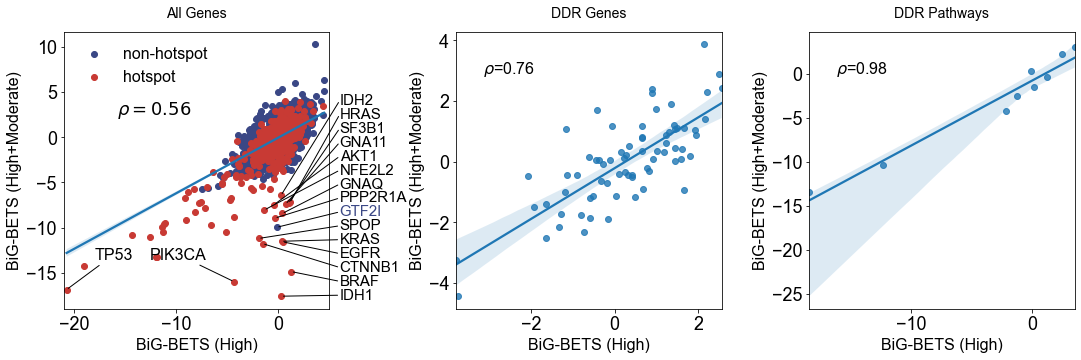

In [67]:
outfile=os.path.join(supplements_dir,'R1_Figure_S3B_tcga_high_vs_high+mod_whotspots_bigbetscores.pdf')
outdir=bigbets.file_locations.bipartite_samples_dir
#load gene scores
all_gene_zscore_wmod=pd.read_csv(bigbets.file_locations.bigbet_moderate_included_scores_file,index_col=0)
all_gene_zscore=pd.read_csv(bigbets.file_locations.bigbet_scores_file,index_col=0)

all_gene_zscore_comb=all_gene_zscore_wmod.join(all_gene_zscore,how='inner',rsuffix='_highonly')
all_gene_zscore_comb['path']=list(map(lambda x: bigbets.ddr_data_object.myddr_obj.gene_2_path_dict.get(x,['None'])[0],all_gene_zscore_comb.index))
all_gene_zscore_comb_filt=all_gene_zscore_comb.loc[all_gene_zscore_comb['path']!='None',:]

all_gene_zscore_comb=all_gene_zscore_comb.dropna(how='any',axis=0)

#load pathway scores
all_path_zscore_wmod=pd.read_csv(os.path.join(outdir,'tcga_allgenes_moderate_high_path_rewiring_zscores.csv'),index_col=0)
all_path_zscore=pd.read_csv(os.path.join(outdir,'tcga_allgenes_high_path_rewiring_zscores.csv'),index_col=0)
all_path_zscore_comb=all_path_zscore_wmod.join(all_path_zscore,how='inner',rsuffix='_highonly')
all_path_zscore_comb.head()

all_bigbets_hotspot=all_gene_zscore_comb.loc[all_gene_zscore_comb.index.intersection(hotspot_genes),:]
non_hotspot_genes=all_gene_zscore_comb.loc[all_gene_zscore_comb.index.difference(hotspot_genes),:]
all_bigbets_hotspot.sort_values(by='bigbets',inplace=True,ascending=False)
genes2label=all_bigbets_hotspot.index[np.logical_and.reduce([all_bigbets_hotspot['bigbets_highonly'].abs()<2,all_bigbets_hotspot['bigbets']<-6])]
genes2label2=non_hotspot_genes.index[np.logical_and.reduce([non_hotspot_genes['bigbets_highonly'].abs()<2,non_hotspot_genes['bigbets']<-6])]
genes2label=genes2label.union(genes2label2)
genes2label=all_gene_zscore_comb.loc[genes2label,'bigbets'].sort_values(ascending=False).index

plt.close()
f,a=plt.subplots(1,3,figsize=(17,5))
nrows=1

ncols=28
coords=[(0,0),(0,10),(0,19)]
spans=[7,7,7]

a=plt.subplot2grid((nrows,ncols),coords[0],colspan=spans[0])

x=all_gene_zscore_comb['bigbets_highonly']
y=all_gene_zscore_comb['bigbets']

sbn.regplot(x,y,scatter=False)

#downsample this
inds2keep=non_hotspot_genes.index[np.logical_or.reduce([non_hotspot_genes['bigbets'].abs()>2,non_hotspot_genes['bigbets_highonly'].abs()>2])]
inds2keep=inds2keep.union(np.random.choice(non_hotspot_genes.index,replace=False,size=500))
a.scatter(x='bigbets_highonly',y='bigbets',label='non-hotspot',
          data=non_hotspot_genes.loc[inds2keep,:],color=blue)

a.scatter(x='bigbets_highonly',y='bigbets',label='hotspot',
          data=all_bigbets_hotspot,color=red)

r2,pval=stats.pearsonr(all_gene_zscore_comb['bigbets_highonly'],all_gene_zscore_comb['bigbets'])
a.text(s=r'$\rho={:.2f}$'.format(r2),x=.2,y=.7,transform=a.transAxes,fontsize=18)
a.set_xlabel('BiG-BETS (High)',fontsize=16)
a.set_ylabel('BiG-BETS (High+Moderate)',fontsize=16)
# a.set_title("Hotspot Genes",fontsize=16)
a.legend(frameon=False,fontsize=16)

a.set_xlim([-21,5])

for j,g in enumerate(genes2label):
    y=4 + j*(-19-4)/len(genes2label)
    if g in all_bigbets_hotspot.index:
        a.text(s=g,x=6,y=y,verticalalignment='center',fontsize=15,
               horizontalalignment='left')
        a.annotate(s="",fontsize=16,
                   arrowprops=dict(arrowstyle='-[, widthB=0, lengthB=0', lw=1.0),
                   xytext=(6,y),verticalalignment='center',horizontalalignment='left',
                   xy=(all_bigbets_hotspot.loc[g,'bigbets_highonly'],all_bigbets_hotspot.loc[g,'bigbets']))
    else:
         a.text(s=g,x=6,y=y,verticalalignment='center',fontsize=15,
                horizontalalignment='left',color=blue)
         a.annotate(s="",fontsize=16,
                   arrowprops=dict(arrowstyle='-[, widthB=0, lengthB=0', lw=1.0),
                   xytext=(6,y),verticalalignment='center',horizontalalignment='left',
                   xy=(non_hotspot_genes.loc[g,'bigbets_highonly'],non_hotspot_genes.loc[g,'bigbets']))
        


a.annotate(s='TP53',fontsize=16,
       arrowprops=dict(arrowstyle='-[, widthB=0, lengthB=0', lw=1.0),
       xytext=(-18,-13),verticalalignment='center',horizontalalignment='left',
       xy=(all_bigbets_hotspot.loc['TP53','bigbets_highonly'],all_bigbets_hotspot.loc['TP53','bigbets']))

a.annotate(s='PIK3CA',fontsize=16,
       arrowprops=dict(arrowstyle='-[, widthB=0, lengthB=0', lw=1.0),
       xytext=(-7,-13),verticalalignment='center',horizontalalignment='right',
       xy=(all_bigbets_hotspot.loc['PIK3CA','bigbets_highonly'],all_bigbets_hotspot.loc['PIK3CA','bigbets']))

a.set_title("All Genes",fontsize=14,x=.5,y=1.05,transform=a.transAxes)


a=plt.subplot2grid((nrows,ncols),coords[1],colspan=spans[1])
a.set_title("DDR Genes",fontsize=14,x=.5,y=1.05,transform=a.transAxes)
x=all_gene_zscore_comb_filt['bigbets_highonly']
y=all_gene_zscore_comb_filt['bigbets']
sbn.regplot(x,y)
a.set_xlabel("BiG-BETS (High)",fontsize=16)
a.set_ylabel("BiG-BETS (High+Moderate)",fontsize=16)
r,pval=stats.pearsonr(x,y)
a.text(s=r'$\rho$={:.2f}'.format(r),x=.1,y=.85,transform=a.transAxes,fontsize=16)


a=plt.subplot2grid((nrows,ncols),coords[2],colspan=spans[2])
a.set_title("DDR Pathways",fontsize=14,x=.5,y=1.05,transform=a.transAxes)

x=all_path_zscore_comb['bigbets_highonly']
y=all_path_zscore_comb['bigbets']

sbn.regplot(x,y)
a.set_xlabel("BiG-BETS (High)",fontsize=16)
a.set_ylabel("BiG-BETS (High+Moderate)",fontsize=16)

r,pval=stats.pearsonr(x,y)
a.text(s=r'$\rho$={:.2f}'.format(r),x=.1,y=.85,transform=a.transAxes,fontsize=16)
f.subplots_adjust(right=.97,left=.08,bottom=.13,top=.9,wspace=.3)
f.savefig(outfile)
plt.show()

In [66]:
inds2keep=non_hotspot_genes.index[np.logical_or.reduce([non_hotspot_genes['bigbets'].abs()>2,non_hotspot_genes['bigbets_highonly'].abs()>2])]
len(inds2keep)

1999

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecati

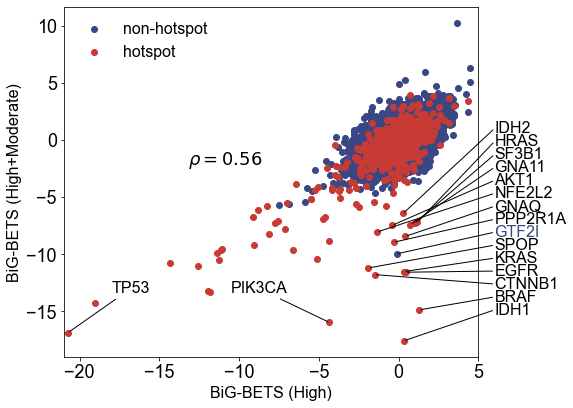

In [50]:
outfile=os.path.join(graphics_dir,'bigbets_mod+high_vs_high_with_hotspots.pdf')
all_bigbets_hotspot=all_gene_zscore_comb.loc[all_gene_zscore_comb.index.intersection(hotspot_genes),:]
non_hotspot_genes=all_gene_zscore_comb.loc[all_gene_zscore_comb.index.difference(hotspot_genes),:]
all_bigbets_hotspot.sort_values(by='bigbets',inplace=True,ascending=False)
genes2label=all_bigbets_hotspot.index[np.logical_and.reduce([all_bigbets_hotspot['bigbets_highonly'].abs()<2,all_bigbets_hotspot['bigbets']<-6])]
genes2label2=non_hotspot_genes.index[np.logical_and.reduce([non_hotspot_genes['bigbets_highonly'].abs()<2,non_hotspot_genes['bigbets']<-6])]
genes2label=genes2label.union(genes2label2)
genes2label=all_gene_zscore_comb.loc[genes2label,'bigbets'].sort_values(ascending=False).index
# genes2label2=all_bigbets_hotspot.index[np.logical_and.reduce([all_bigbets_hotspot['bigbets_highonly']<-5,all_bigbets_hotspot['bigbets']<-5])]


plt.close()
f,a=plt.subplots(1,1,figsize=(8,6))
a.scatter(x='bigbets_highonly',y='bigbets',label='non-hotspot',
          data=non_hotspot_genes,color=blue)
a.scatter(x='bigbets_highonly',y='bigbets',label='hotspot',
          data=all_bigbets_hotspot,color=red)

r2,pval=stats.pearsonr(all_gene_zscore_comb['bigbets_highonly'],all_gene_zscore_comb['bigbets'])
a.text(s=r'$\rho={:.2f}$'.format(r2),x=.3,y=.55,transform=a.transAxes,fontsize=18)
a.set_xlabel('BiG-BETS (High)',fontsize=16)
a.set_ylabel('BiG-BETS (High+Moderate)',fontsize=16)
# a.set_title("Hotspot Genes",fontsize=16)
a.legend(frameon=False,fontsize=16)

a.set_xlim([-21,5])

for j,g in enumerate(genes2label):
    y=1 + j*(-16-1)/len(genes2label)
    if g in all_bigbets_hotspot.index:
        a.text(s=g,x=6,y=y,verticalalignment='center',fontsize=16,
               horizontalalignment='left')
        a.annotate(s="",fontsize=16,
                   arrowprops=dict(arrowstyle='-[, widthB=0, lengthB=0', lw=1.0),
                   xytext=(6,y),verticalalignment='center',horizontalalignment='left',
                   xy=(all_bigbets_hotspot.loc[g,'bigbets_highonly'],all_bigbets_hotspot.loc[g,'bigbets']))
    else:
         a.text(s=g,x=6,y=y,verticalalignment='center',fontsize=16,
                horizontalalignment='left',color=blue)
         a.annotate(s="",fontsize=16,
                   arrowprops=dict(arrowstyle='-[, widthB=0, lengthB=0', lw=1.0),
                   xytext=(6,y),verticalalignment='center',horizontalalignment='left',
                   xy=(non_hotspot_genes.loc[g,'bigbets_highonly'],non_hotspot_genes.loc[g,'bigbets']))
        


a.annotate(s='TP53',fontsize=16,
       arrowprops=dict(arrowstyle='-[, widthB=0, lengthB=0', lw=1.0),
       xytext=(-18,-13),verticalalignment='center',horizontalalignment='left',
       xy=(all_bigbets_hotspot.loc['TP53','bigbets_highonly'],all_bigbets_hotspot.loc['TP53','bigbets']))

a.annotate(s='PIK3CA',fontsize=16,
       arrowprops=dict(arrowstyle='-[, widthB=0, lengthB=0', lw=1.0),
       xytext=(-7,-13),verticalalignment='center',horizontalalignment='right',
       xy=(all_bigbets_hotspot.loc['PIK3CA','bigbets_highonly'],all_bigbets_hotspot.loc['PIK3CA','bigbets']))
    
    
# for j,g in enumerate(genes2label2):
#     y=-2 + j*(-16+2)/len(genes2label)
#     a.annotate(s=g,fontsize=14,
#                arrowprops=dict(arrowstyle='-[, widthB=0, lengthB=0', lw=1.0),
#                xytext=(all_bigbets_hotspot.loc[g,'bigbets_highonly']-5,all_bigbets_hotspot.loc[g,'bigbets']),
#                xy=(all_bigbets_hotspot.loc[g,'bigbets_highonly'],all_bigbets_hotspot.loc[g,'bigbets']))

f.subplots_adjust(top=.96,bottom=.15,right=.84,left=.12)
f.savefig(outfile)
plt.show()

## Percentage Genes High BigBETS by pathway

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


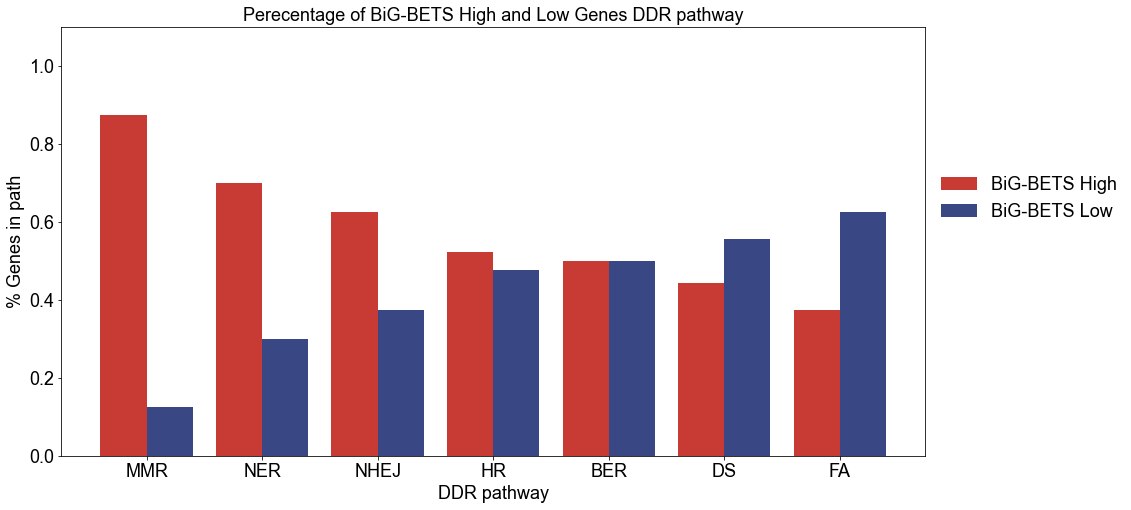

In [51]:
outfile=os.path.join(supplements_dir,'R1_Figure_S6A_percent_high_low_zscore_by_DDRpathway.pdf')
ddr_filt_only=all_big_bets.iloc[np.where(np.logical_not(all_big_bets['path'].isin(['None'])))[0],:]

ddr_filt_only['z_score_class']=ddr_filt_only['bigbets'].apply(lambda x: 'high' if x > 0 else 'low')
pathway_zscoreclass=ddr_filt_only.groupby(['path','z_score_class']).size().unstack()
pathway_zscoreclass['size']=np.sum(pathway_zscoreclass,axis=1)
pathway_zscoreclass['per_high']=pathway_zscoreclass['high']/pathway_zscoreclass['size']
pathway_zscoreclass['per_low']=pathway_zscoreclass['low']/pathway_zscoreclass['size']
pathway_zscoreclass.sort_values(by='per_high',ascending=False,inplace=True)

plt.close()
f,a=plt.subplots(1,1,figsize=(16,7))

a=plt.subplot(1,1,1)
a.bar(x=np.arange(pathway_zscoreclass.shape[0])-.2,width=.4,
      height=pathway_zscoreclass['per_high'],color=red,label='BiG-BETS High')
a.set_ylabel("% Genes in path",fontsize=18)
a.set_xlabel("DDR pathway",fontsize=18)

a.bar(x=np.arange(pathway_zscoreclass.shape[0])+.2, width=.4,
      height=pathway_zscoreclass['per_low'],color=blue,label='BiG-BETS Low')

a.set_xticks(range(pathway_zscoreclass.shape[0]))
a.set_xticklabels(pathway_zscoreclass.index)
a.legend(fontsize=18,frameon=False,bbox_to_anchor=[1.12,.6],loc=10)
a.set_ylim([0,1.1])
a.set_title("Perecentage of BiG-BETS High and Low Genes DDR pathway",fontsize=18)

f.subplots_adjust(top=.945,bottom=.094,right=.81,left=.06)
f.savefig(outfile,dpi=200)
plt.show()